In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
import klib
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn import tree
import warnings
warnings.filterwarnings('ignore', message='Test/Validation dataset column .* has levels not trained on')

PROBLEM STATEMENT:fraud detection using RandomForest classifier by comparing and analysing with Decision Tree classifier and H2O.ai(automl libraries)......
#REFERENCES:HANDS ON MACHINE LEARNING WITH SCIKIT-LEARN,TENSORFLOW AD AUTOKERAS BOOK,ALONG WITH RESEARCH PAPER OF FRAUD DETECTION WITH H2O.AI AND BLOCKCHAIN TECHNOLOGY.

In [2]:
data = pd.read_csv("/home/apiiit123/Downloads/fraud_oracle.csv")
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
data.tail()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
15419,Dec,2,Wednesday,Toyota,Urban,Thursday,Dec,3,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [5]:
data.isnull().any()

Month                  False
WeekOfMonth            False
DayOfWeek              False
Make                   False
AccidentArea           False
DayOfWeekClaimed       False
MonthClaimed           False
WeekOfMonthClaimed     False
Sex                    False
MaritalStatus          False
Age                    False
Fault                  False
PolicyType             False
VehicleCategory        False
VehiclePrice           False
FraudFound_P           False
PolicyNumber           False
RepNumber              False
Deductible             False
DriverRating           False
PastNumberOfClaims     False
AgeOfVehicle           False
AgeOfPolicyHolder      False
PoliceReportFiled      False
WitnessPresent         False
AgentType              False
NumberOfSuppliments    False
AddressChange_Claim    False
NumberOfCars           False
Year                   False
BasePolicy             False
dtype: bool

In [6]:
data.isnull().sum()

Month                  0
WeekOfMonth            0
DayOfWeek              0
Make                   0
AccidentArea           0
DayOfWeekClaimed       0
MonthClaimed           0
WeekOfMonthClaimed     0
Sex                    0
MaritalStatus          0
Age                    0
Fault                  0
PolicyType             0
VehicleCategory        0
VehiclePrice           0
FraudFound_P           0
PolicyNumber           0
RepNumber              0
Deductible             0
DriverRating           0
PastNumberOfClaims     0
AgeOfVehicle           0
AgeOfPolicyHolder      0
PoliceReportFiled      0
WitnessPresent         0
AgentType              0
NumberOfSuppliments    0
AddressChange_Claim    0
NumberOfCars           0
Year                   0
BasePolicy             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                15420 non-null  object
 1   WeekOfMonth          15420 non-null  int64 
 2   DayOfWeek            15420 non-null  object
 3   Make                 15420 non-null  object
 4   AccidentArea         15420 non-null  object
 5   DayOfWeekClaimed     15420 non-null  object
 6   MonthClaimed         15420 non-null  object
 7   WeekOfMonthClaimed   15420 non-null  int64 
 8   Sex                  15420 non-null  object
 9   MaritalStatus        15420 non-null  object
 10  Age                  15420 non-null  int64 
 11  Fault                15420 non-null  object
 12  PolicyType           15420 non-null  object
 13  VehicleCategory      15420 non-null  object
 14  VehiclePrice         15420 non-null  object
 15  FraudFound_P         15420 non-null  int64 
 16  Poli

In [8]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [9]:
numeric_data = data.select_dtypes(include=['float','int'])  # Selecting only numeric columns
correlation_matrix = numeric_data.corr()
correlation_matrix

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


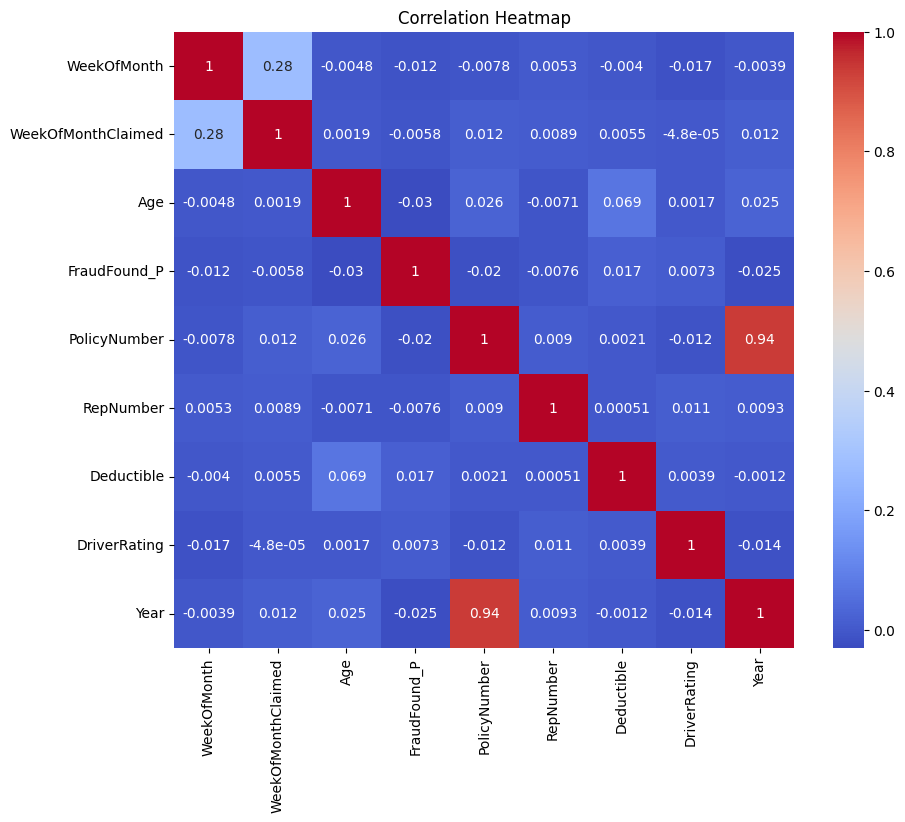

In [10]:
#correlation map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
data.drop(columns = ['PolicyNumber', 'Make','AgentType','BasePolicy','Month','MonthClaimed'])

,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,...,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
0,5,Wednesday,Urban,Tuesday,1,Female,Single,21,Policy Holder,Sport - Liability,...,1,none,3 years,26 to 30,No,No,none,1 year,3 to 4,1994
1,3,Wednesday,Urban,Monday,4,Male,Single,34,Policy Holder,Sport - Collision,...,4,none,6 years,31 to 35,Yes,No,none,no change,1 vehicle,1994
2,5,Friday,Urban,Thursday,2,Male,Married,47,Policy Holder,Sport - Collision,...,3,1,7 years,41 to 50,No,No,none,no change,1 vehicle,1994
3,2,Saturday,Rural,Friday,1,Male,Married,65,Third Party,Sedan - Liability,...,2,1,more than 7,51 to 65,Yes,No,more than 5,no change,1 vehicle,1994
4,5,Monday,Urban,Tuesday,2,Female,Single,27,Third Party,Sport - Collision,...,1,none,5 years,31 to 35,No,No,none,no change,1 vehicle,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,4,Friday,Urban,Tuesday,5,Male,Married,35,Policy Holder,Sedan - Collision,...,4,2 to 4,6 years,31 to 35,No,No,none,no change,1 vehicle,1996
15416,5,Thursday,Urban,Friday,1,Male,Married,30,Policy Holder,Sedan - Liability,...,3,more than 4,6 years,31 to 35,No,No,more than 5,no change,3 to 4,1996
15417,5,Thursday,Rural,Friday,1,Male,Single,24,Policy Holder,Sedan - Collision,...,4,more than 4,5 years,26 to 30,No,No,1 to 2,no change,1 vehicle,1996
15418,1,Monday,Urban,Thursday,2,Female,Married,34,Third Party,Sedan - All Perils,...,4,none,2 years,31 to 35,No,No,more than 5,no change,1 vehicle,1996


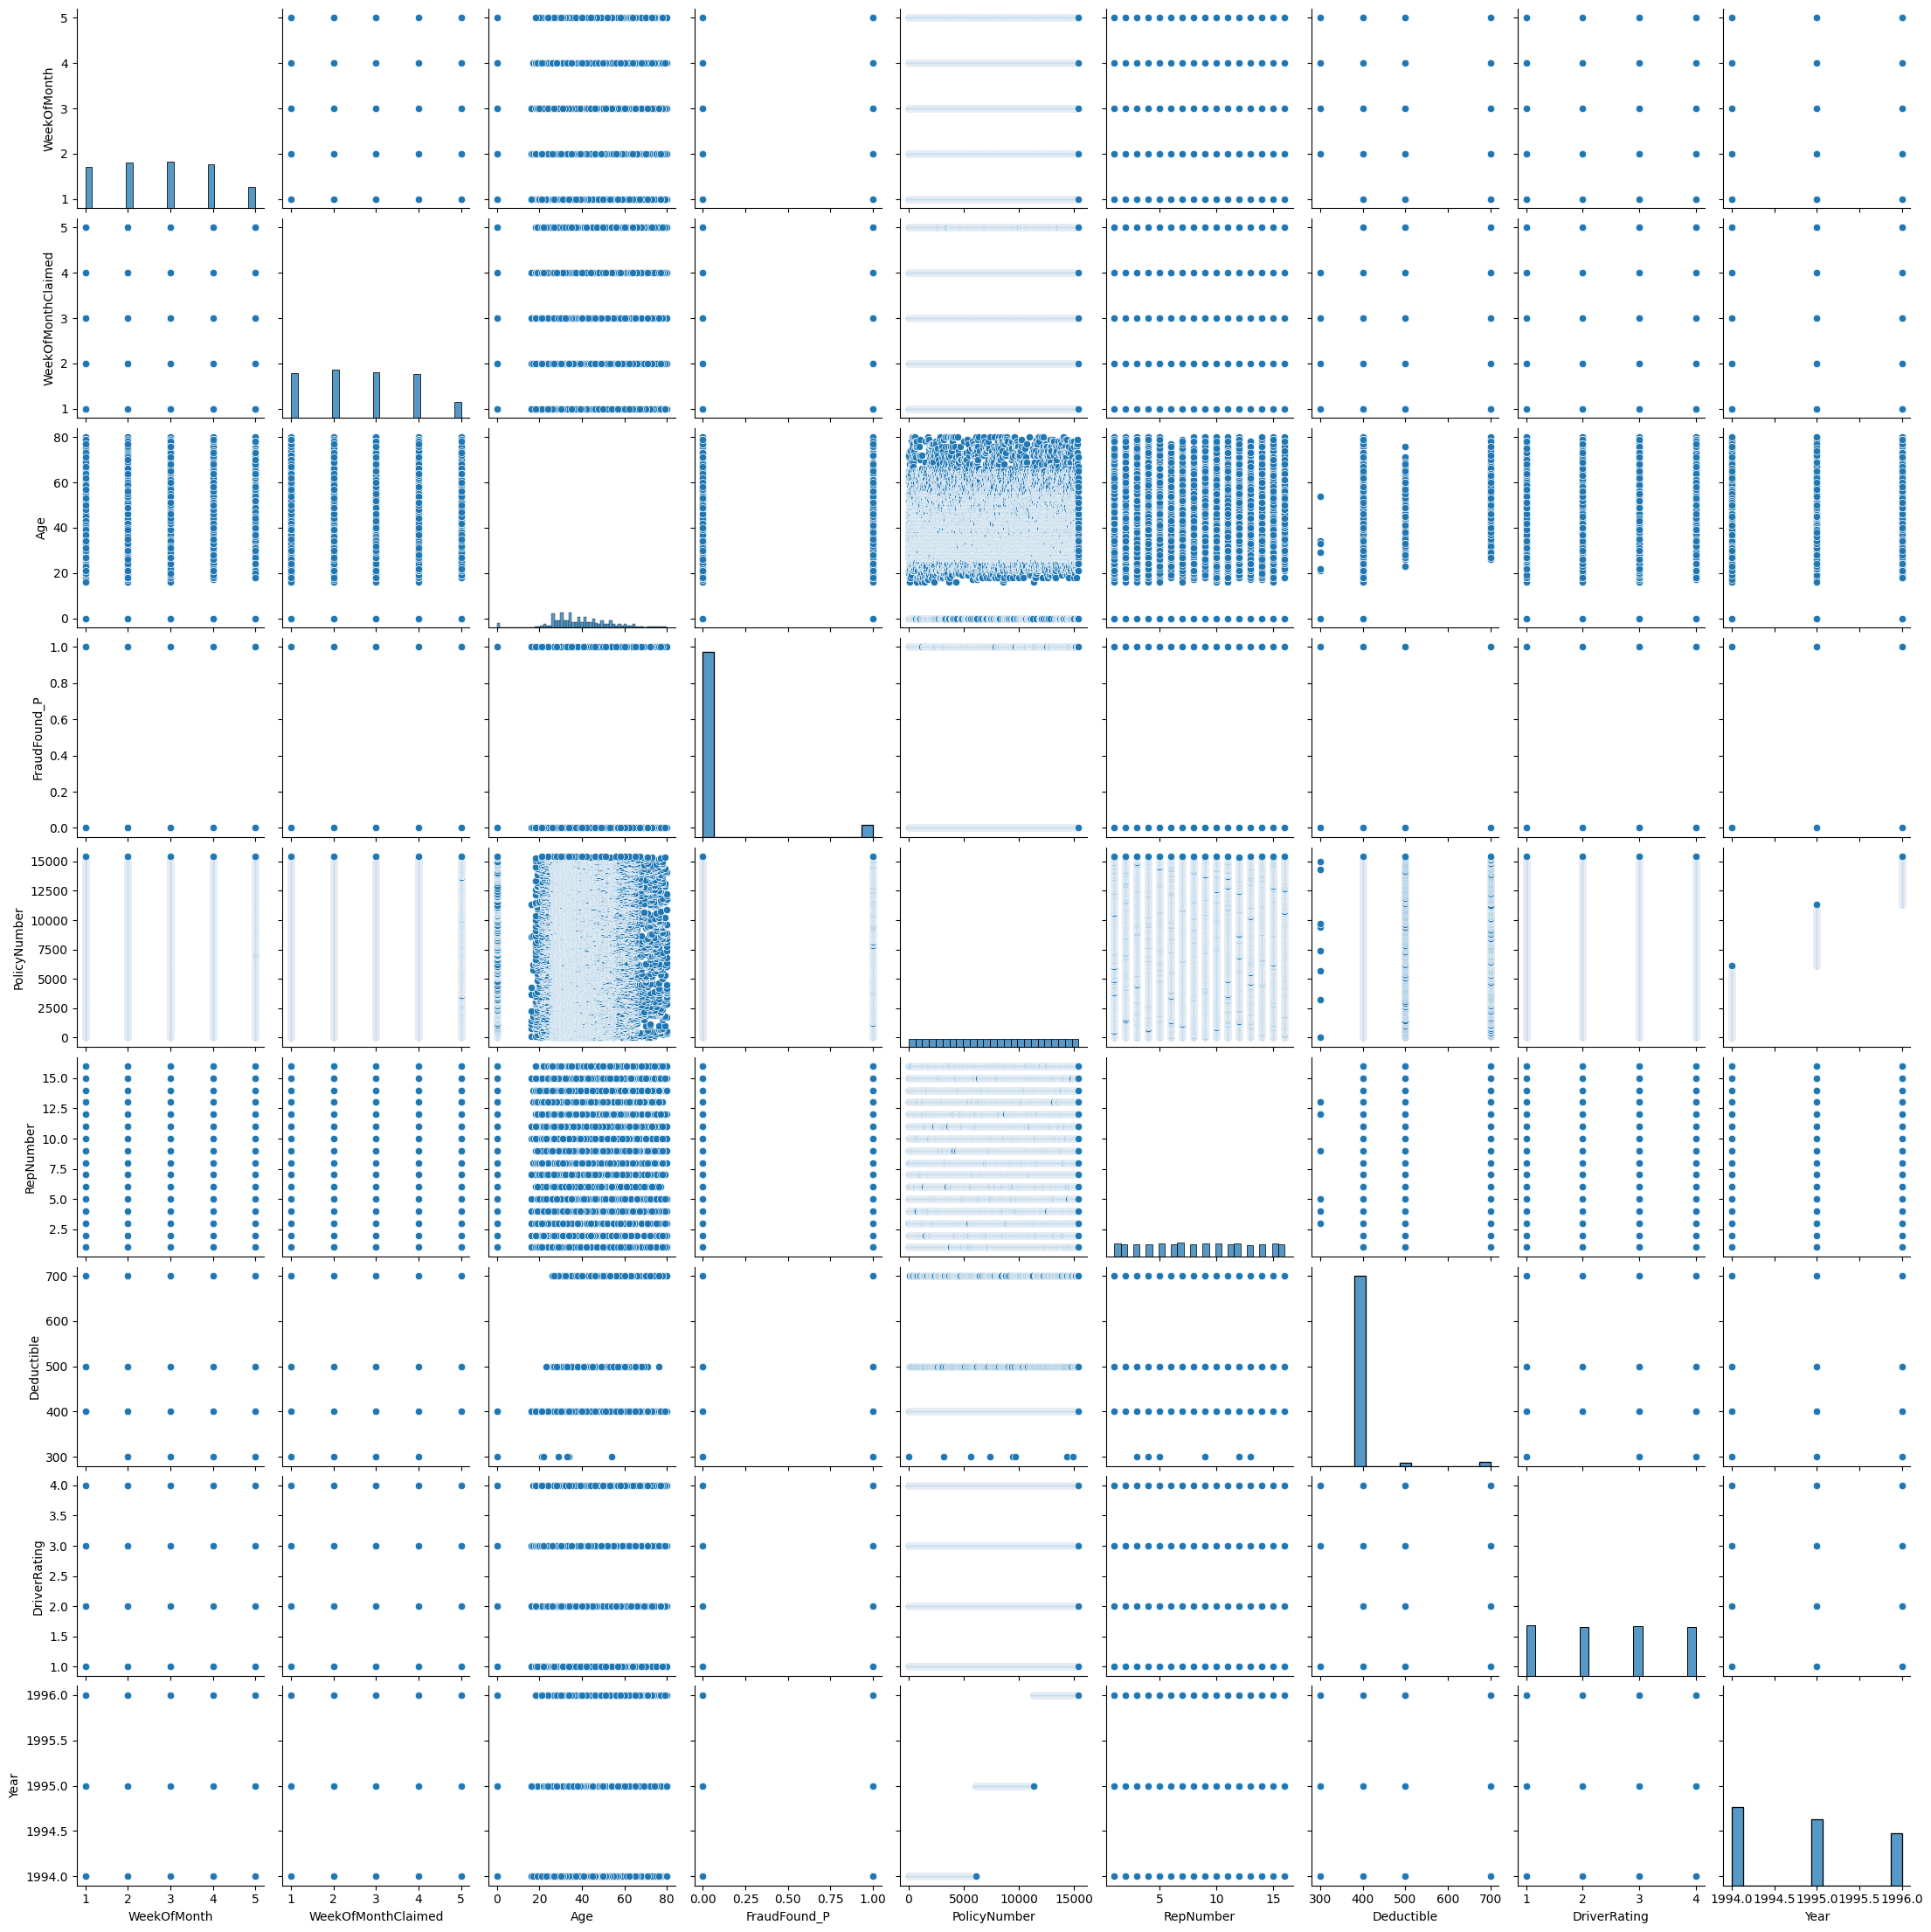

In [12]:
sns.pairplot(data)#to visualize pairwise relationships between features in a dataset, making it easier to understand feature interactions and identify patterns or correlations.
#useful for detecting trends, clusters, or outliers before preprocessing or model building.
plt.show()

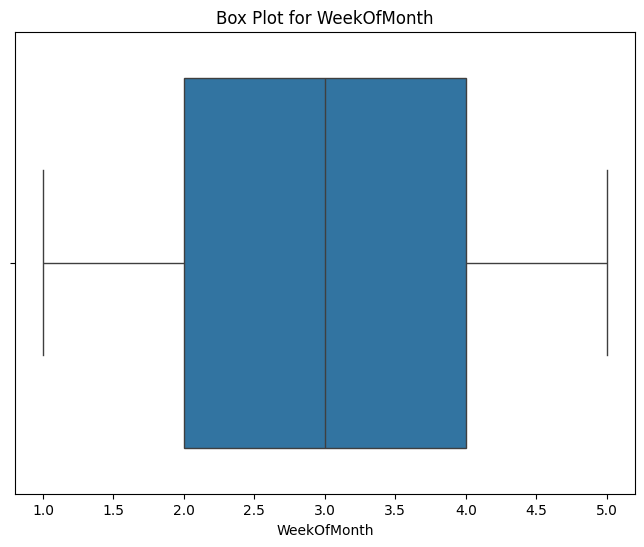

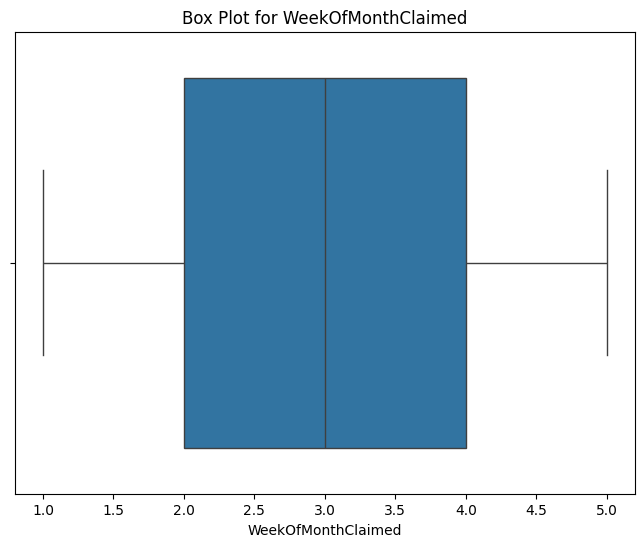

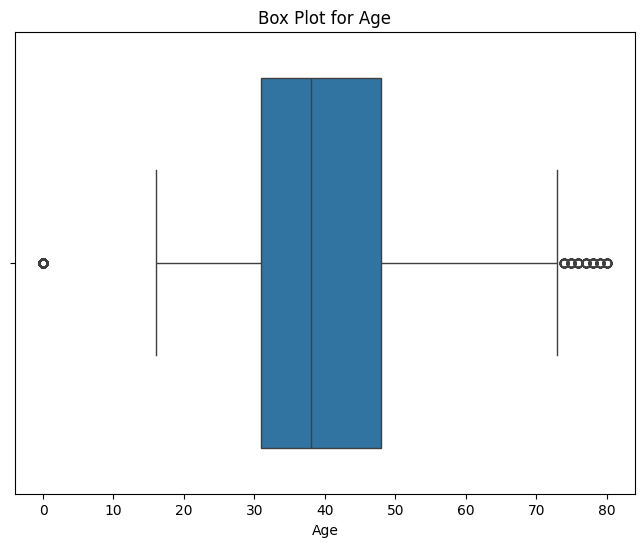

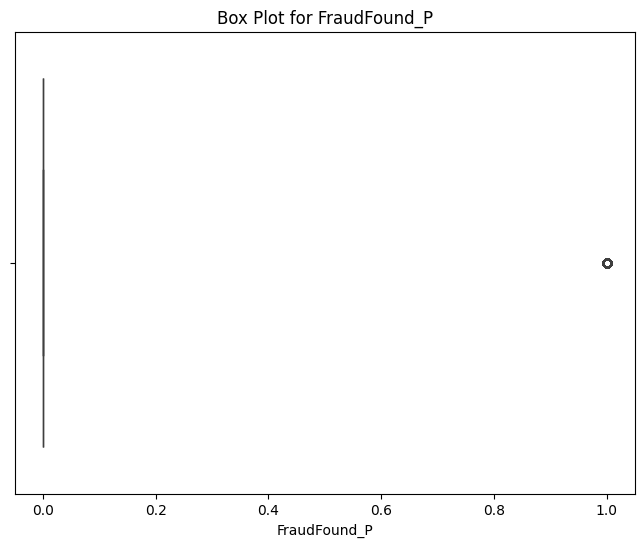

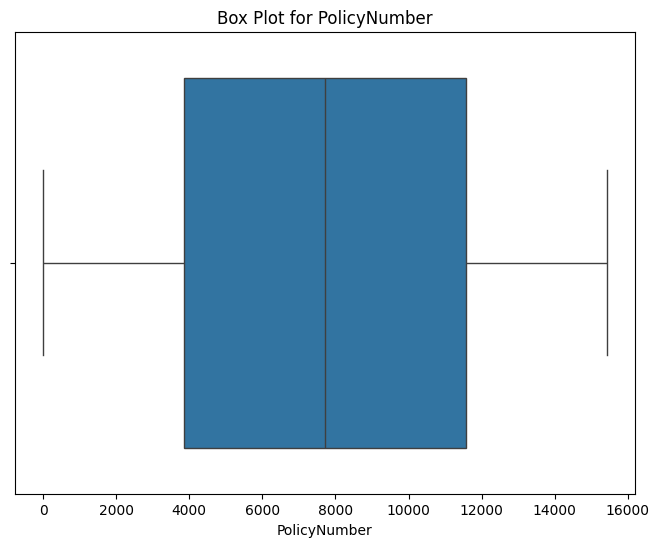

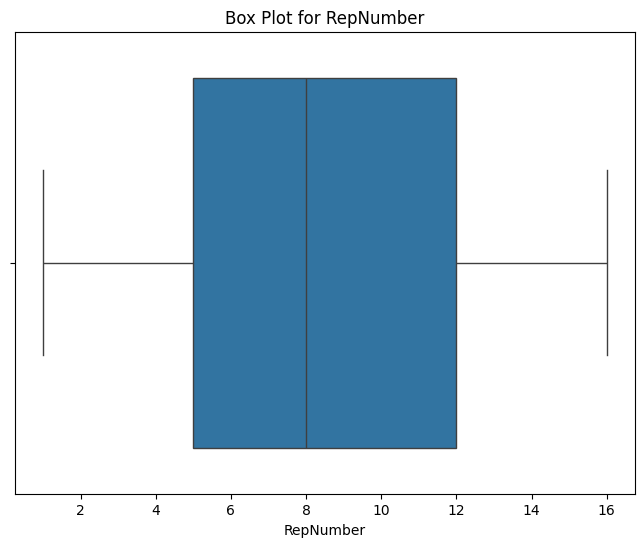

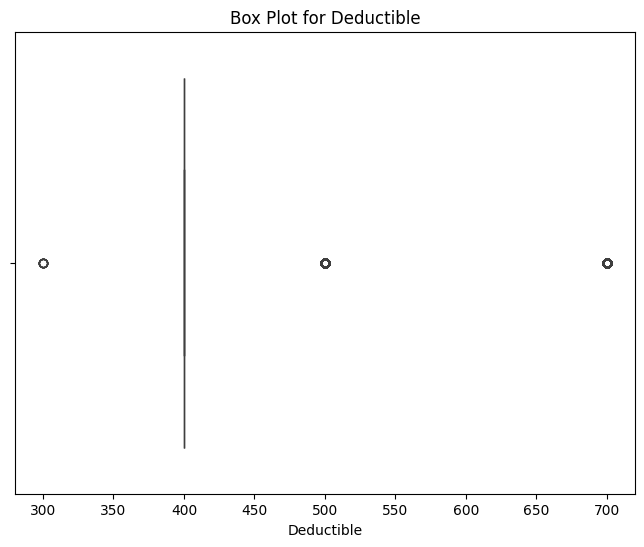

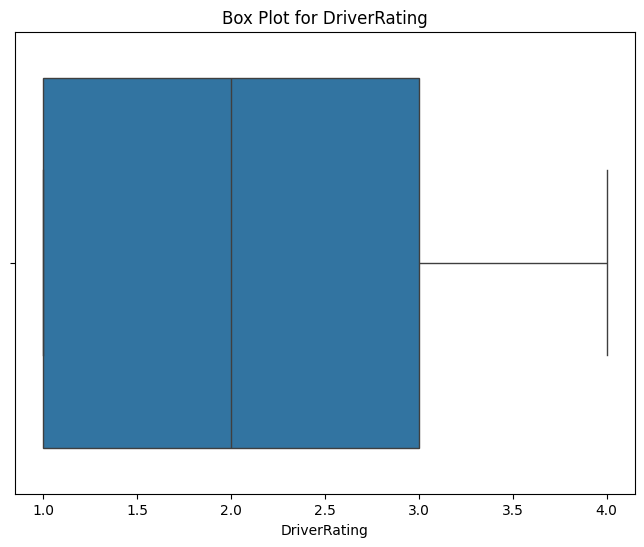

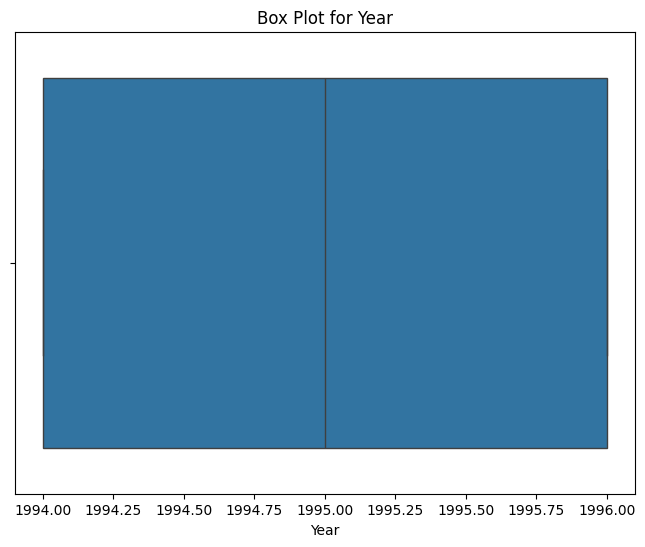

In [13]:
for col in numeric_data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [14]:
data.nunique()

Month                     12
WeekOfMonth                5
DayOfWeek                  7
Make                      19
AccidentArea               2
DayOfWeekClaimed           8
MonthClaimed              13
WeekOfMonthClaimed         5
Sex                        2
MaritalStatus              4
Age                       66
Fault                      2
PolicyType                 9
VehicleCategory            3
VehiclePrice               6
FraudFound_P               2
PolicyNumber           15420
RepNumber                 16
Deductible                 4
DriverRating               4
PastNumberOfClaims         4
AgeOfVehicle               8
AgeOfPolicyHolder          9
PoliceReportFiled          2
WitnessPresent             2
AgentType                  2
NumberOfSuppliments        4
AddressChange_Claim        5
NumberOfCars               5
Year                       3
BasePolicy                 3
dtype: int64

<Axes: title={'center': 'Feature-correlation (pearson)'}>

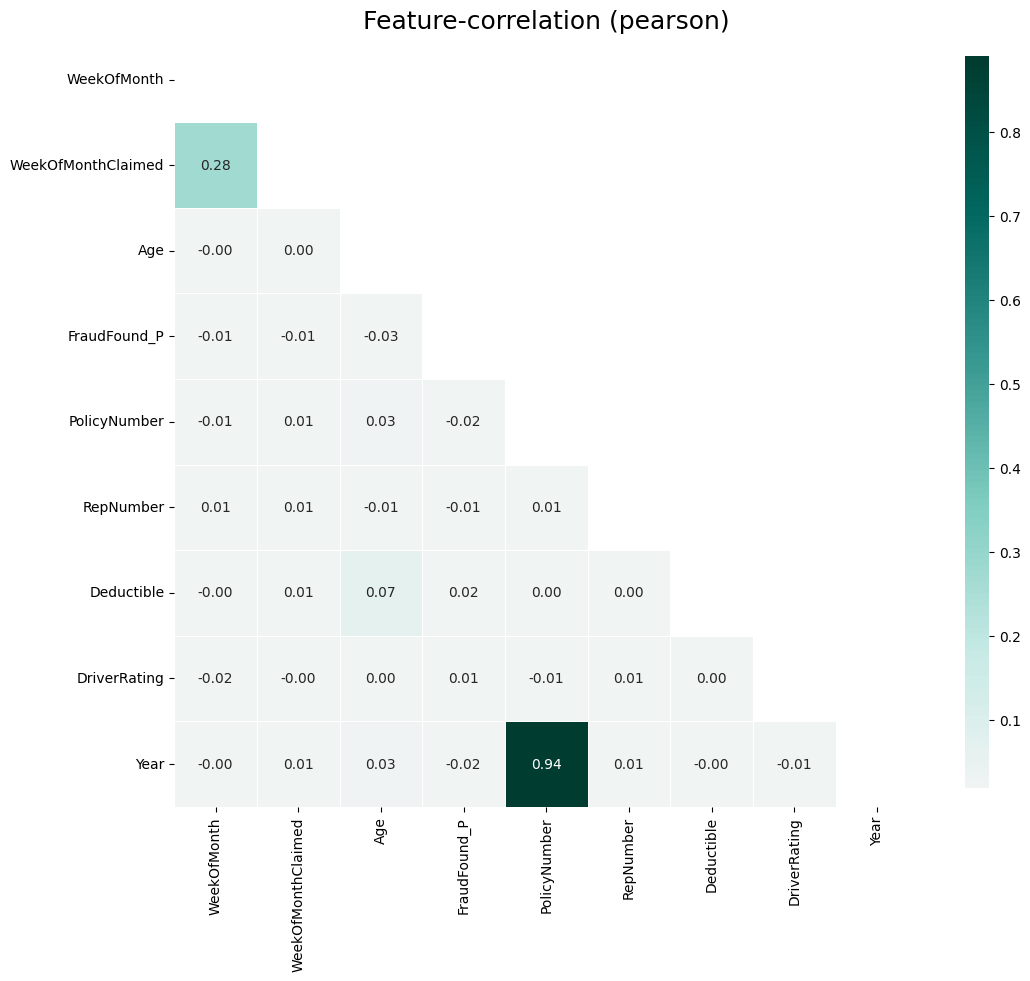

In [15]:
klib.corr_plot(data)#identify highly correlated features, which can lead to multicollinearity, aiding in feature selection and improving model performance.

/tmp/ipykernel_54432/1931470388.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FraudFound_P', data=data, palette='viridis')


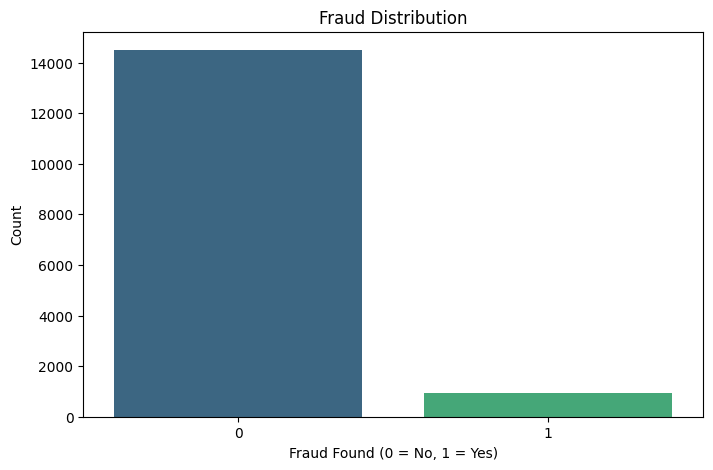

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='FraudFound_P', data=data, palette='viridis')
plt.title("Fraud Distribution")
plt.xlabel("Fraud Found (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [17]:
numeric_data

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


In [18]:
numeric_columns = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'Deductible', 'DriverRating','Year']
z_scores = data[numeric_columns].apply(zscore)
threshold = 4
outliers = (z_scores.abs() > threshold)
outlier_rows = data[outliers.any(axis=1)]
outlier_rows

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
93,Aug,4,Saturday,Pontiac,Urban,Monday,Aug,5,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1994,Collision
217,Jan,5,Tuesday,Mazda,Urban,Tuesday,Jan,5,Male,Married,...,more than 7,over 65,No,No,External,1 to 2,no change,1 vehicle,1994,Liability
248,Feb,3,Friday,Toyota,Urban,Monday,Feb,3,Male,Single,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
341,Sep,4,Sunday,Toyota,Urban,Tuesday,Oct,2,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
372,Sep,2,Tuesday,Chevrolet,Rural,Wednesday,Sep,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,Oct,2,Wednesday,Chevrolet,Urban,Friday,Oct,3,Male,Married,...,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils
15314,Jan,5,Saturday,Pontiac,Urban,Monday,Jan,5,Female,Single,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Liability
15345,Nov,2,Tuesday,Chevrolet,Urban,Friday,Nov,3,Male,Married,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Collision
15376,Jan,3,Friday,Ford,Urban,Thursday,Jan,3,Male,Married,...,7 years,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [19]:
# Remove rows with outliers
data_no_outliers = data[~outliers.any(axis=1)]

In [20]:
data_no_outliers

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [21]:
x = data_no_outliers.drop('FraudFound_P', axis=1)
y = data_no_outliers['FraudFound_P'] 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
print(len(x_train),len(y_train),len(x_test),len(y_test))

10576 10576 4533 4533


In [24]:
categorical_columns = x_train.select_dtypes(include=['object']).columns

In [25]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[ ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns) ],remainder='passthrough')

In [26]:
rf = RandomForestClassifier()
# Create a full pipeline with preprocessing and the model
pipeline = Pipeline(steps=[ ('preprocessor', preprocessor), ('classifier', rf)])

In [27]:
param_grid = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

In [28]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=2, verbose=2, n_jobs=-1)
# Fit the model
grid_search.fit(x_train, y_train)#systematically tune hyperparameters for a specific model by evaluating all combinations on cross-validation splits, ensuring optimal settings

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVe...
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [10, 50, 100]},
             verbose=2)

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best Score: 0.9414712556732223


In [30]:
rf_model = RandomForestClassifier(random_state=42)
best_rf_model = grid_search.fit(x_train, y_train)
y_pred = best_rf_model.predict(x_test)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9395543789984557

In [32]:
confusion = confusion_matrix(y_test, y_pred)

In [33]:
confusion

array([[4256,    2],
       [ 272,    3]])

In [34]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4258
           1       0.60      0.01      0.02       275

    accuracy                           0.94      4533
   macro avg       0.77      0.51      0.50      4533
weighted avg       0.92      0.94      0.91      4533



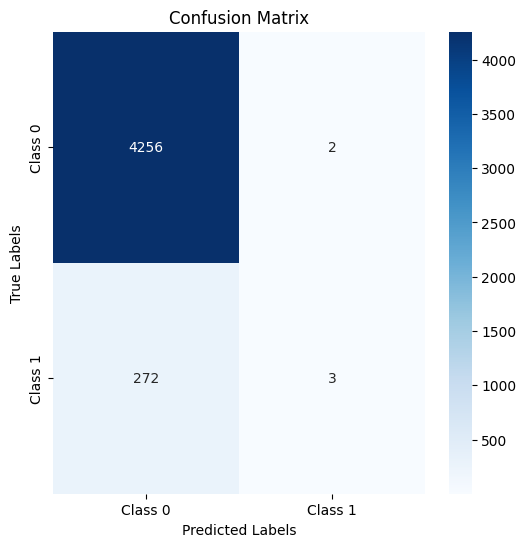

In [35]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

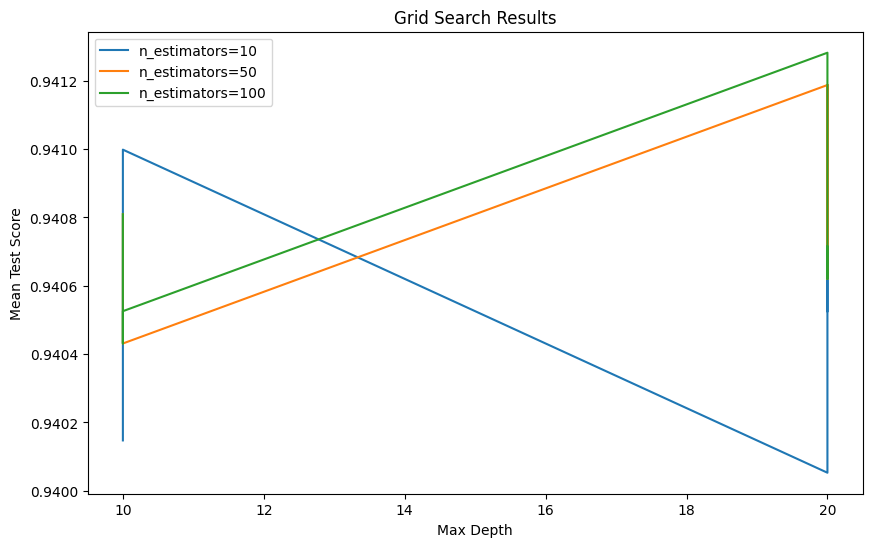

In [36]:
results_df = pd.DataFrame(grid_search.cv_results_)
# Plot mean test score for different hyperparameters
plt.figure(figsize=(10, 6))
for param in param_grid['classifier__n_estimators']:
    subset = results_df[results_df['param_classifier__n_estimators'] == param]
    plt.plot(subset['param_classifier__max_depth'], subset['mean_test_score'], label=f"n_estimators={param}")
plt.xlabel("Max Depth")
plt.ylabel("Mean Test Score")
plt.title("Grid Search Results")
plt.legend()
plt.show()

In [37]:
model = DecisionTreeClassifier(random_state=42)

In [38]:
model

DecisionTreeClassifier(random_state=42)

In [39]:
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()) ])

In [40]:
categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [41]:
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numeric_columns), ('cat', categorical_transformer, categorical_columns)])

In [42]:
pipeline_dt = Pipeline(steps=[ ('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
#simplifies the ML workflow by combining preprocessing steps and model training into a single sequence, ensuring consistent and efficient data handling.

In [43]:
param_grid_dt= {
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5],
    'classifier__criterion': ['gini', 'entropy'],
}

In [44]:
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, n_jobs=-1, verbose=1)

In [45]:
grid_search_dt.fit(x_train, y_train)
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.preprocessing")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [46]:
grid_search_dt.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 2}

In [47]:
dt_model = DecisionTreeClassifier(random_state=42)
best_dt_model = grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [48]:
y_pred_dt = best_dt_model.best_estimator_.predict(x_test)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.9410986101919259
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4258
           1       1.00      0.03      0.06       275

    accuracy                           0.94      4533
   macro avg       0.97      0.51      0.51      4533
weighted avg       0.94      0.94      0.91      4533

Confusion Matrix:
 [[4258    0]
 [ 267    8]]


In [50]:
pipeline_dt.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['WeekOfMonth',
                                                   'WeekOfMonthClaimed', 'Age',
                                                   'RepNumber', 'Deductible',
                                                   'DriverRating', 'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown=...
                                                  Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [51]:
numeric_columns = x.select_dtypes(exclude=['object']).columns.tolist()  # Convert to list if not already
categorical_columns = x.select_dtypes(include=['object']).columns.tolist()

In [52]:
categorical_feature_names = pipeline_dt.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_columns)

In [53]:
all_feature_names = numeric_columns + categorical_feature_names.tolist()

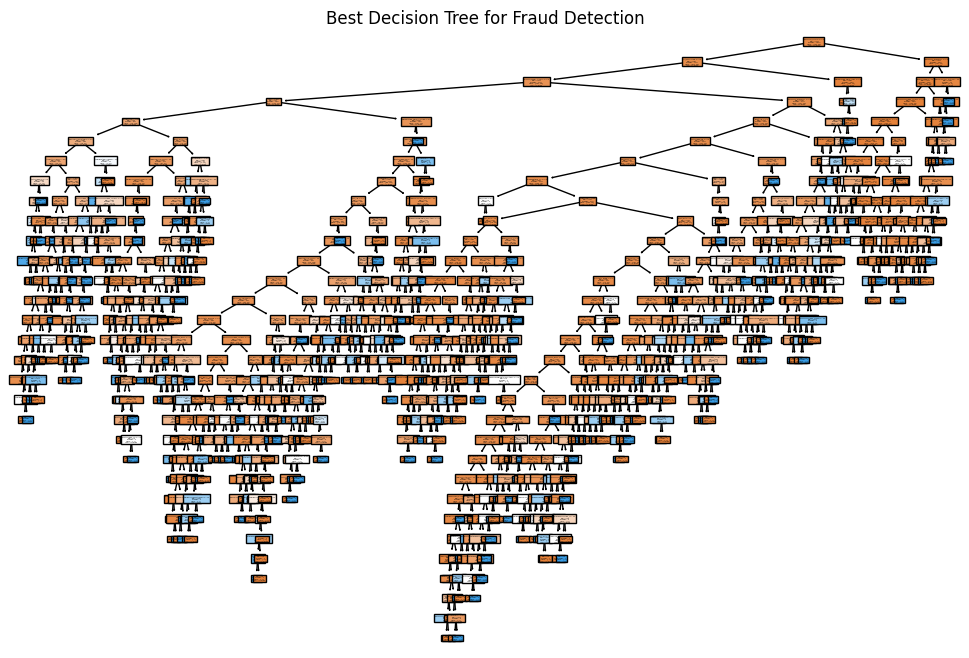

In [54]:
plt.figure(figsize=(12, 8))
tree.plot_tree(pipeline_dt.named_steps['classifier'], filled=True, feature_names=all_feature_names, class_names=['No Fraud', 'Fraud'])
plt.title("Best Decision Tree for Fraud Detection")
plt.show()

In [55]:
!pip install h20

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement h20 (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
ERROR: No matching distribution found for h20


In [56]:
import h2o
from h2o.automl import H2OAutoML#offers automated feature engineering, hyperparameter tuning, and model selection, ensuring the best possible performance. It also provides scalability and efficient handling of large datasets

In [57]:
h2o.init()# AutoML platform that automates machine learning workflows, including model selection, hyperparameter tuning,
#and feature engineering, to deliver optimal predictive models efficiently.

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 13 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_apiiit123_hvdaxy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.328 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [58]:
train_h2o = h2o.H2OFrame(pd.concat([x_train, y_train], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([x_test, y_test], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
target = 'FraudFound_P'
features = x_train.columns.tolist()

In [60]:
train_h2o['FraudFound_P'] = train_h2o['FraudFound_P'].asfactor()
test_h2o['FraudFound_P'] = test_h2o['FraudFound_P'].asfactor()

In [61]:
automl = H2OAutoML(max_models=50, seed=42, max_runtime_secs=600)
automl.train(x=features, y=target, training_frame=train_h2o)
h2o.display.toggle_user_tips()

AutoML progress: |████████████████████████[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   2.9s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=10; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=10; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   2.5s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   5.4s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=50; total time=   1.8s
[CV] END classifier__max_depth=None, classifier__min_samp

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20241212_163541_model_3,0.953205,0.12035,0.60575,0.148057,0.1887,0.0356078,4511,0.022338,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_7,0.951596,0.119227,0.635564,0.193269,0.183814,0.0337875,23853,0.025269,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_1,0.94857,0.135854,0.618055,0.167057,0.195431,0.0381932,37925,0.029745,XGBoost
XGBoost_3_AutoML_2_20241212_163541,0.948283,0.121933,0.60496,0.184008,0.189445,0.0358894,10427,0.031679,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_2,0.947648,0.125585,0.629944,0.187227,0.189081,0.0357517,6267,0.041396,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_5,0.94744,0.130516,0.598972,0.166944,0.193857,0.0375806,24831,0.024689,XGBoost
GBM_2_AutoML_2_20241212_163541,0.944941,0.128625,0.569113,0.164072,0.19592,0.0383846,2865,0.053286,GBM
GBM_1_AutoML_2_20241212_163541,0.944068,0.127911,0.553574,0.151231,0.19609,0.0384514,4969,0.064153,GBM
GBM_5_AutoML_2_20241212_163541,0.939792,0.131318,0.569431,0.208288,0.196651,0.0386717,4932,0.061629,GBM
GBM_4_AutoML_2_20241212_163541,0.938172,0.135551,0.54294,0.17844,0.200203,0.0400813,6645,0.044617,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_2_20241212_163541

,0,1,Error,Rate
0,4053.0,205.0,0.0481,(205.0/4258.0)
1,77.0,198.0,0.28,(77.0/275.0)
Total,4130.0,403.0,0.0622,(282.0/4533.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

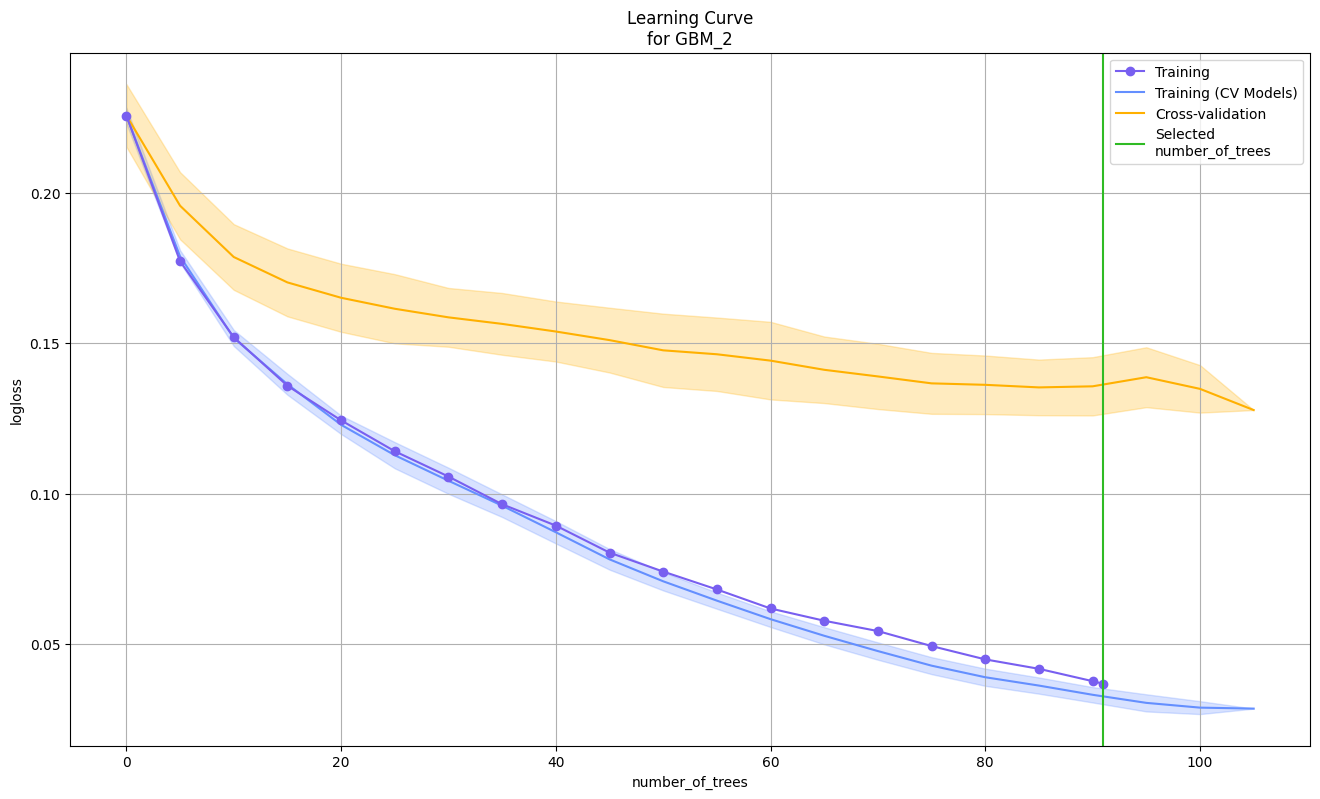

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

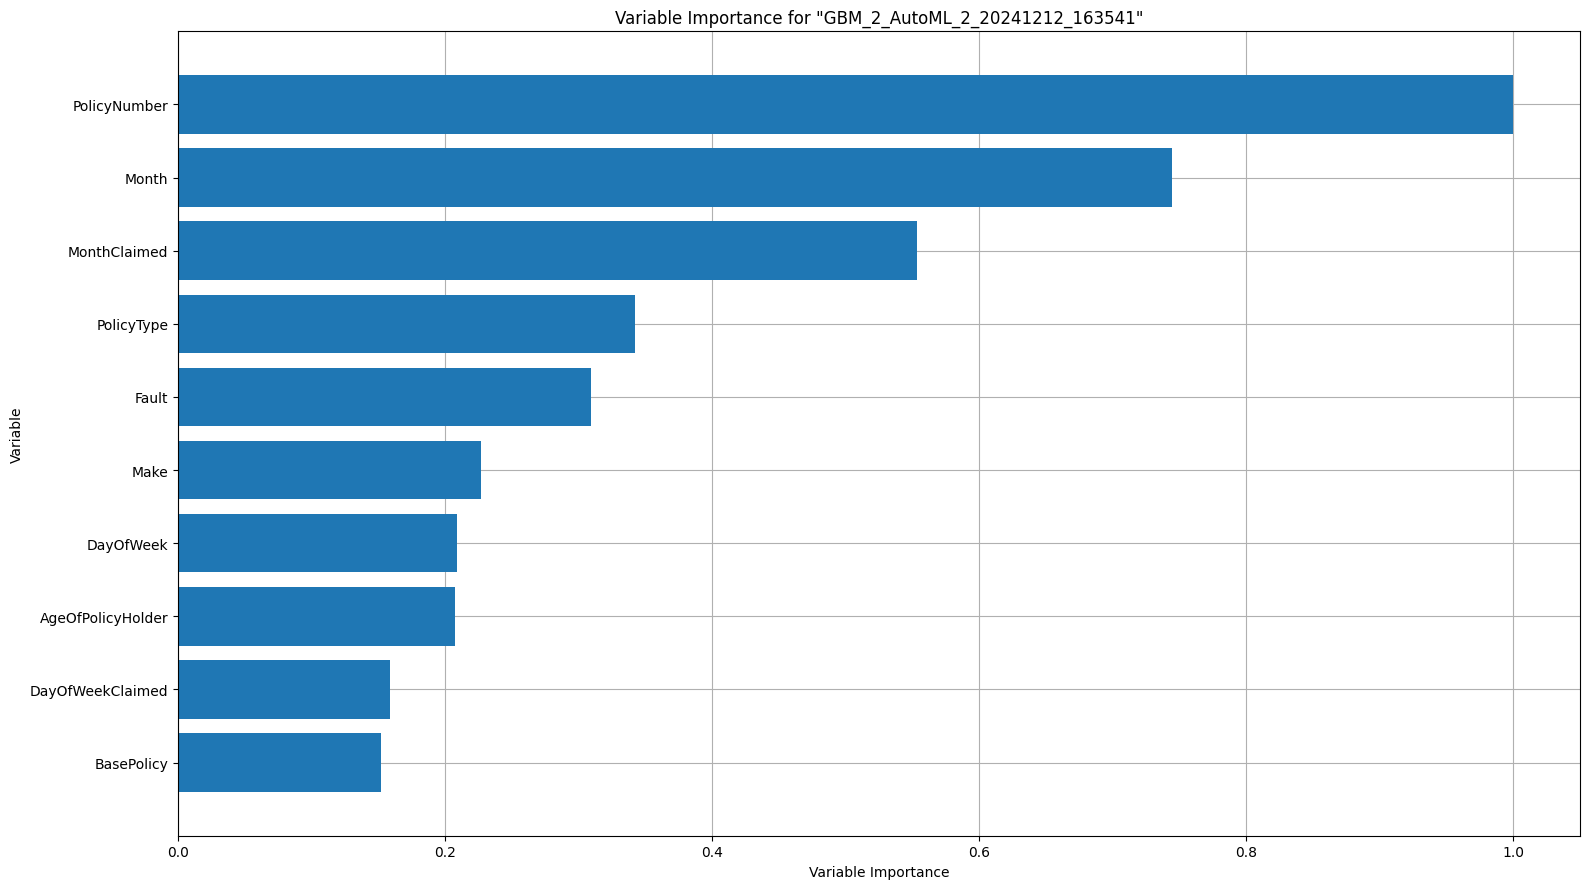

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

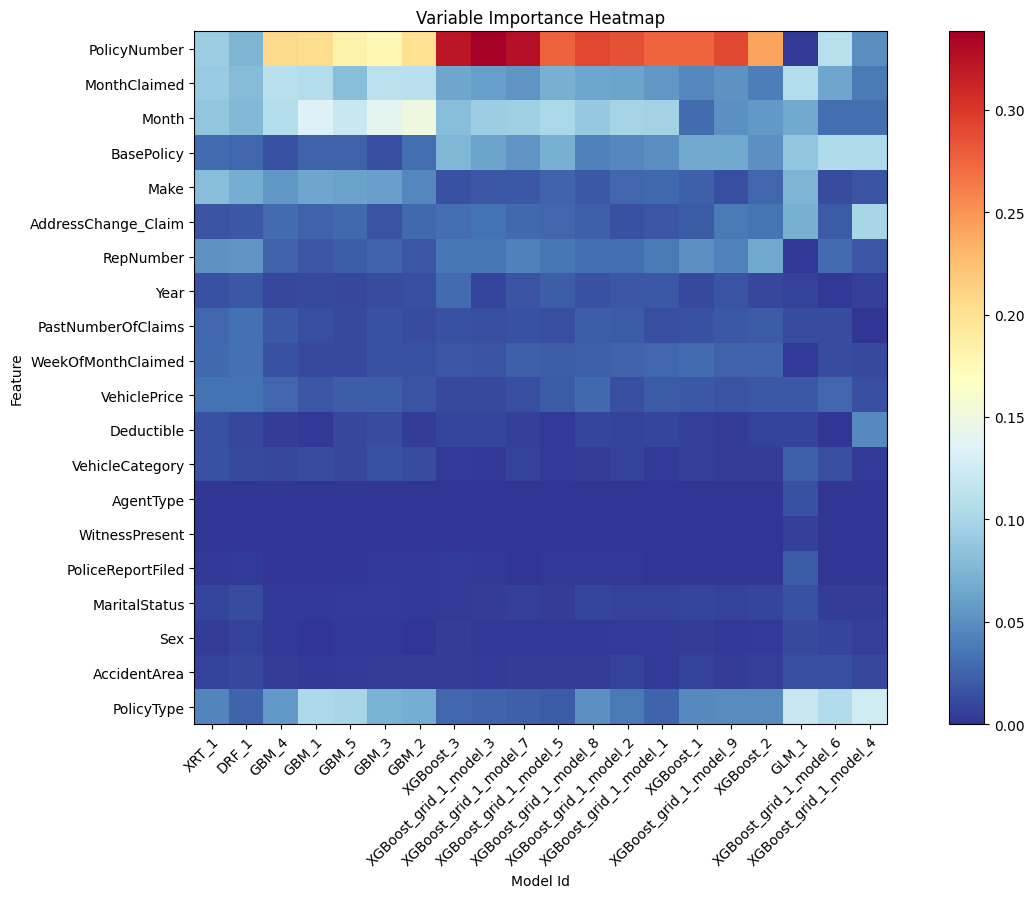

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

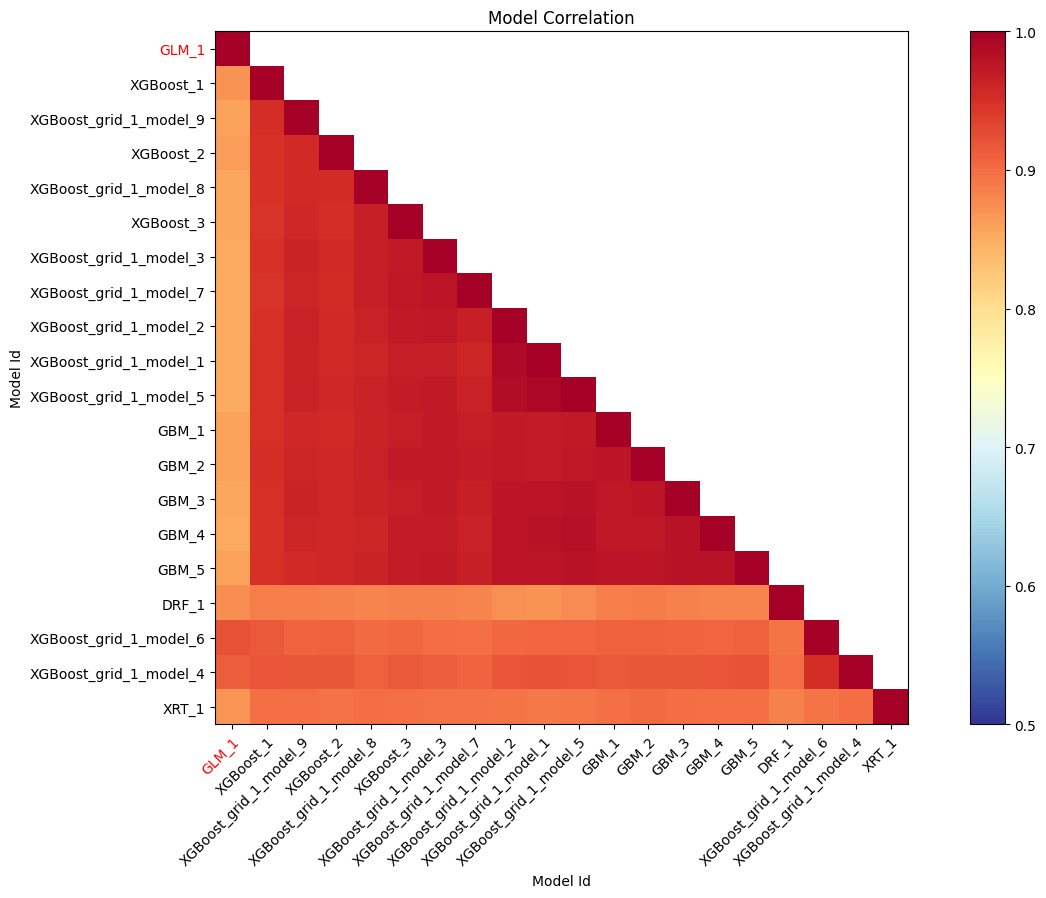

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

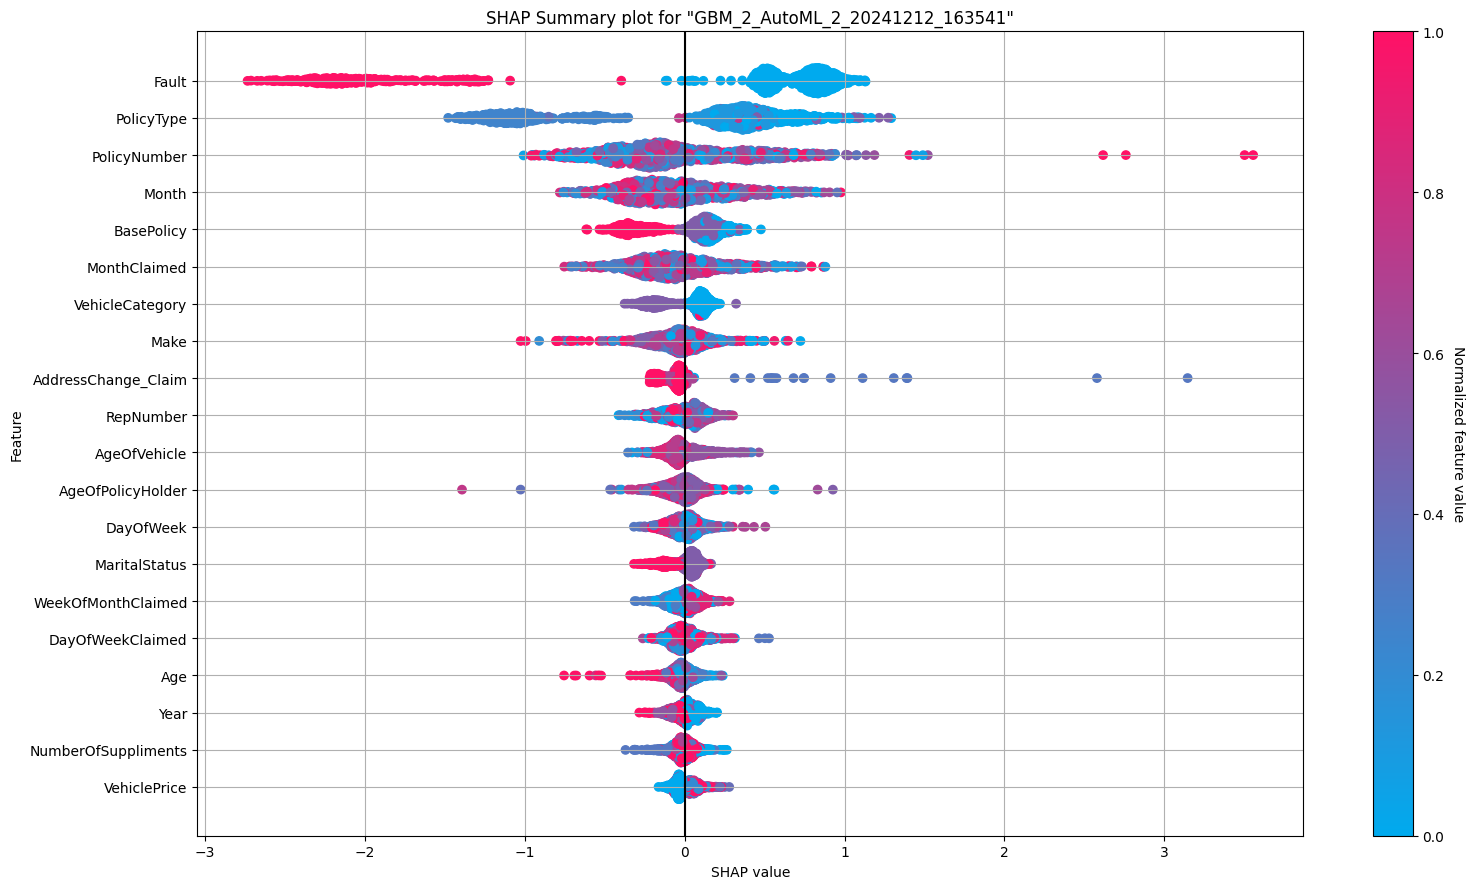

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

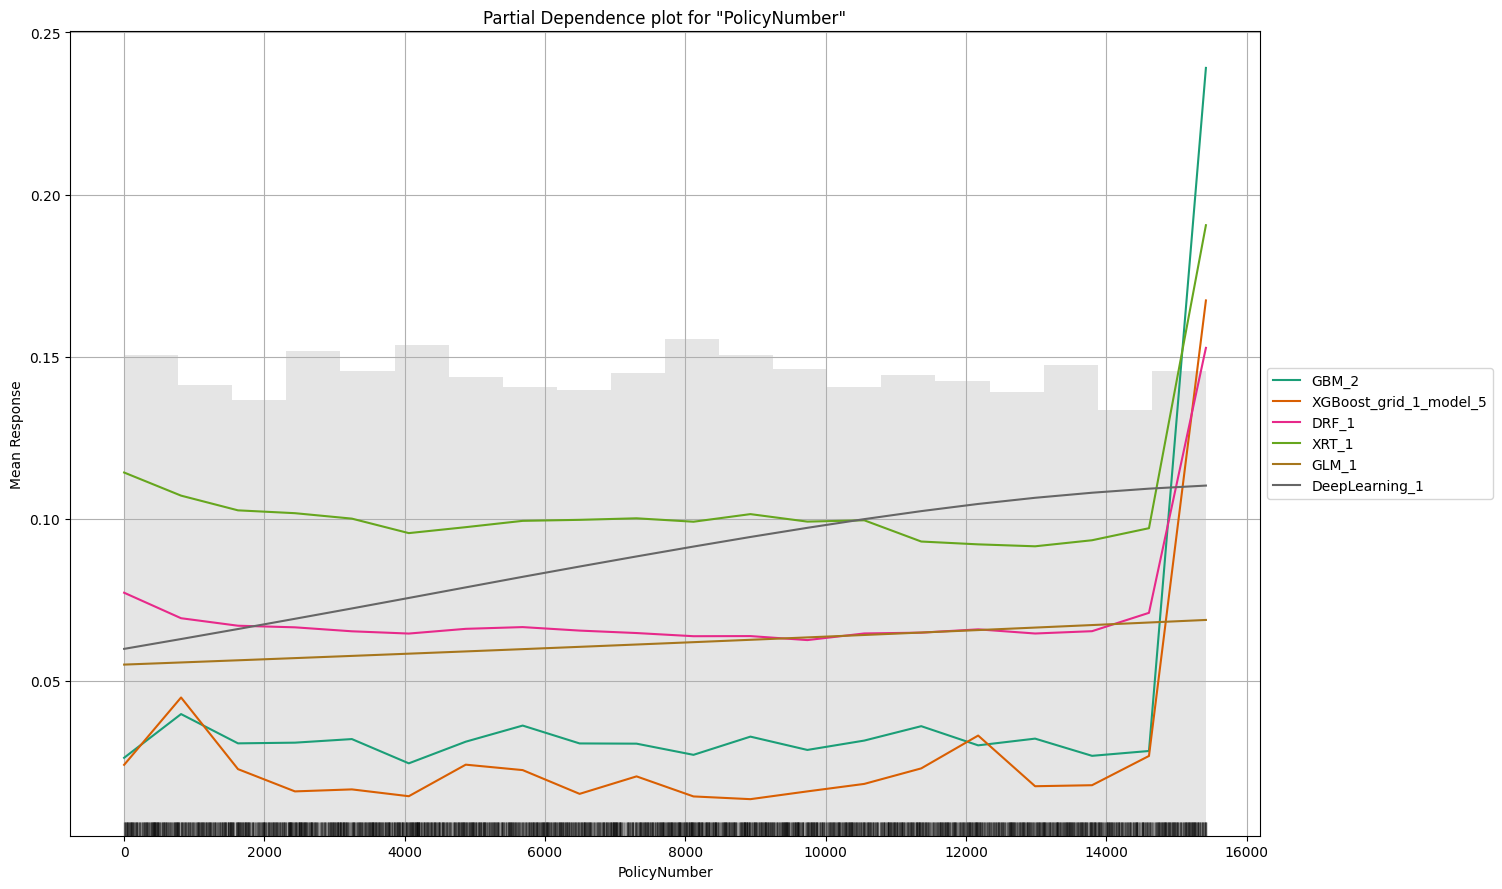

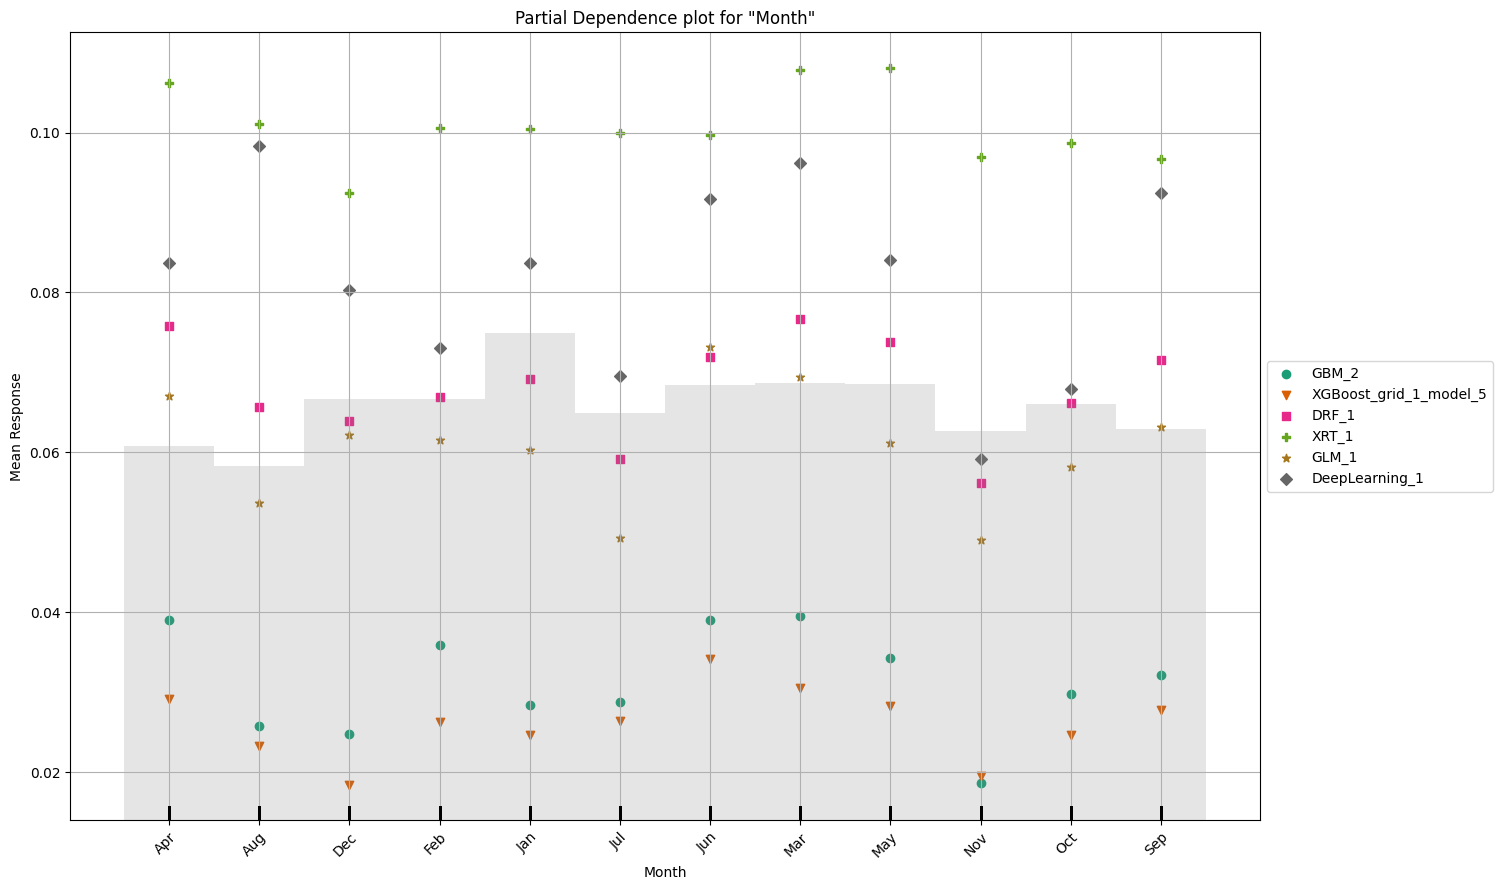

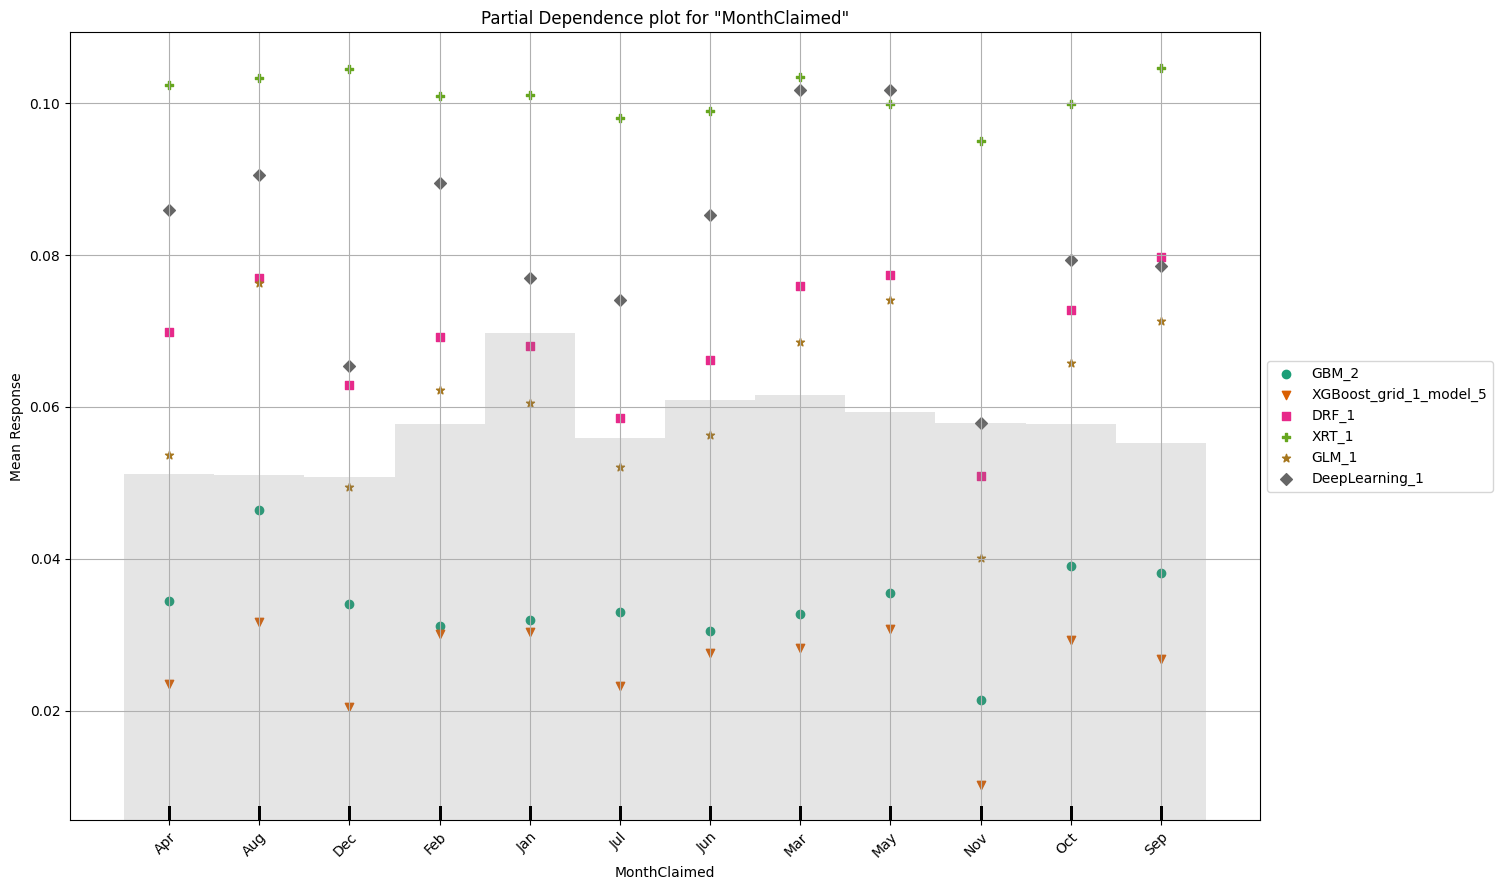

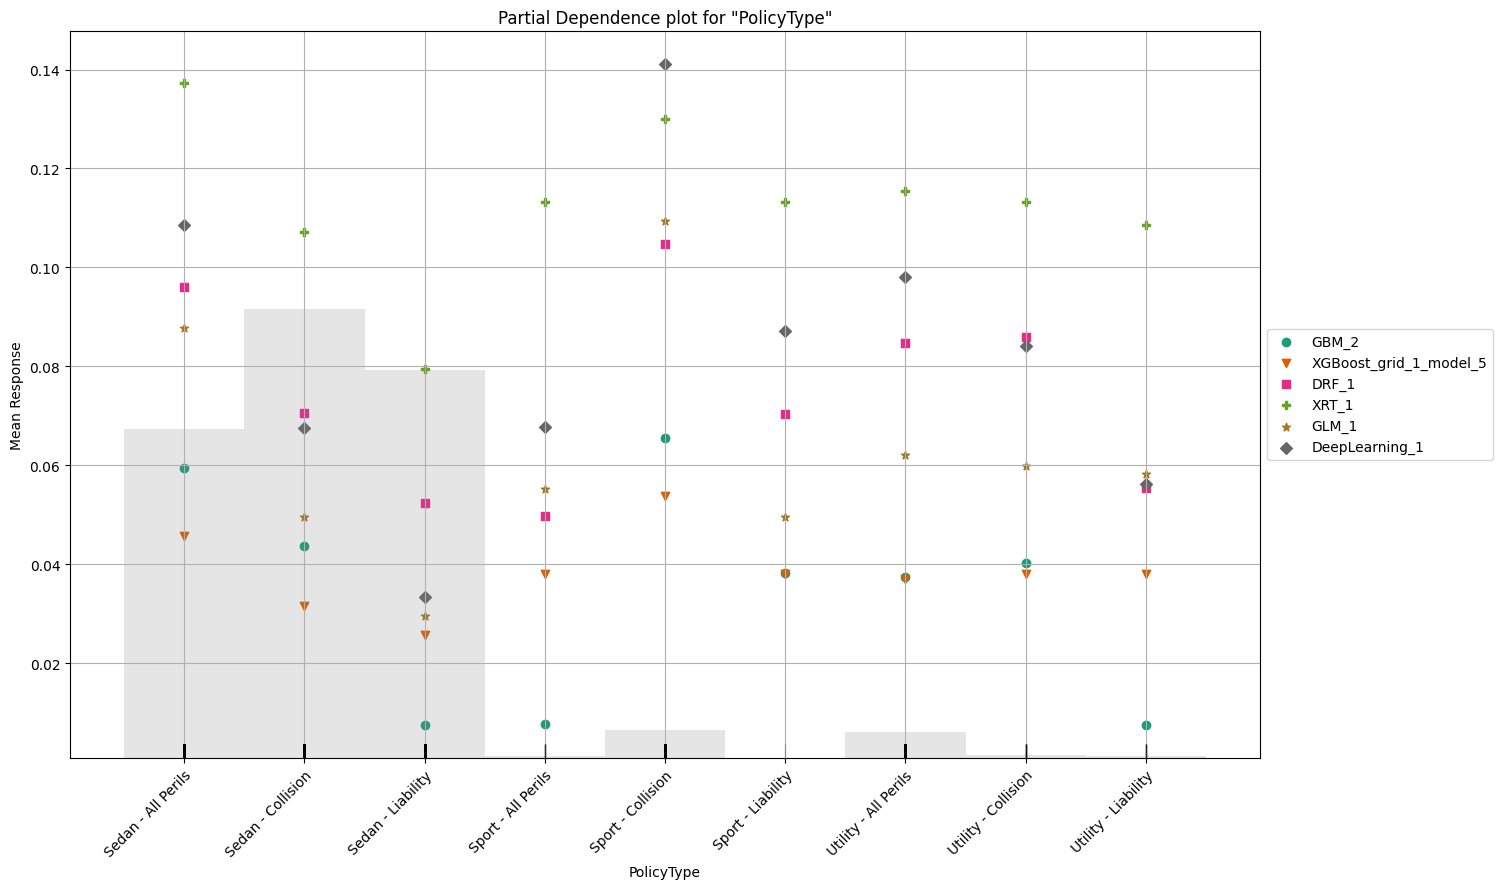

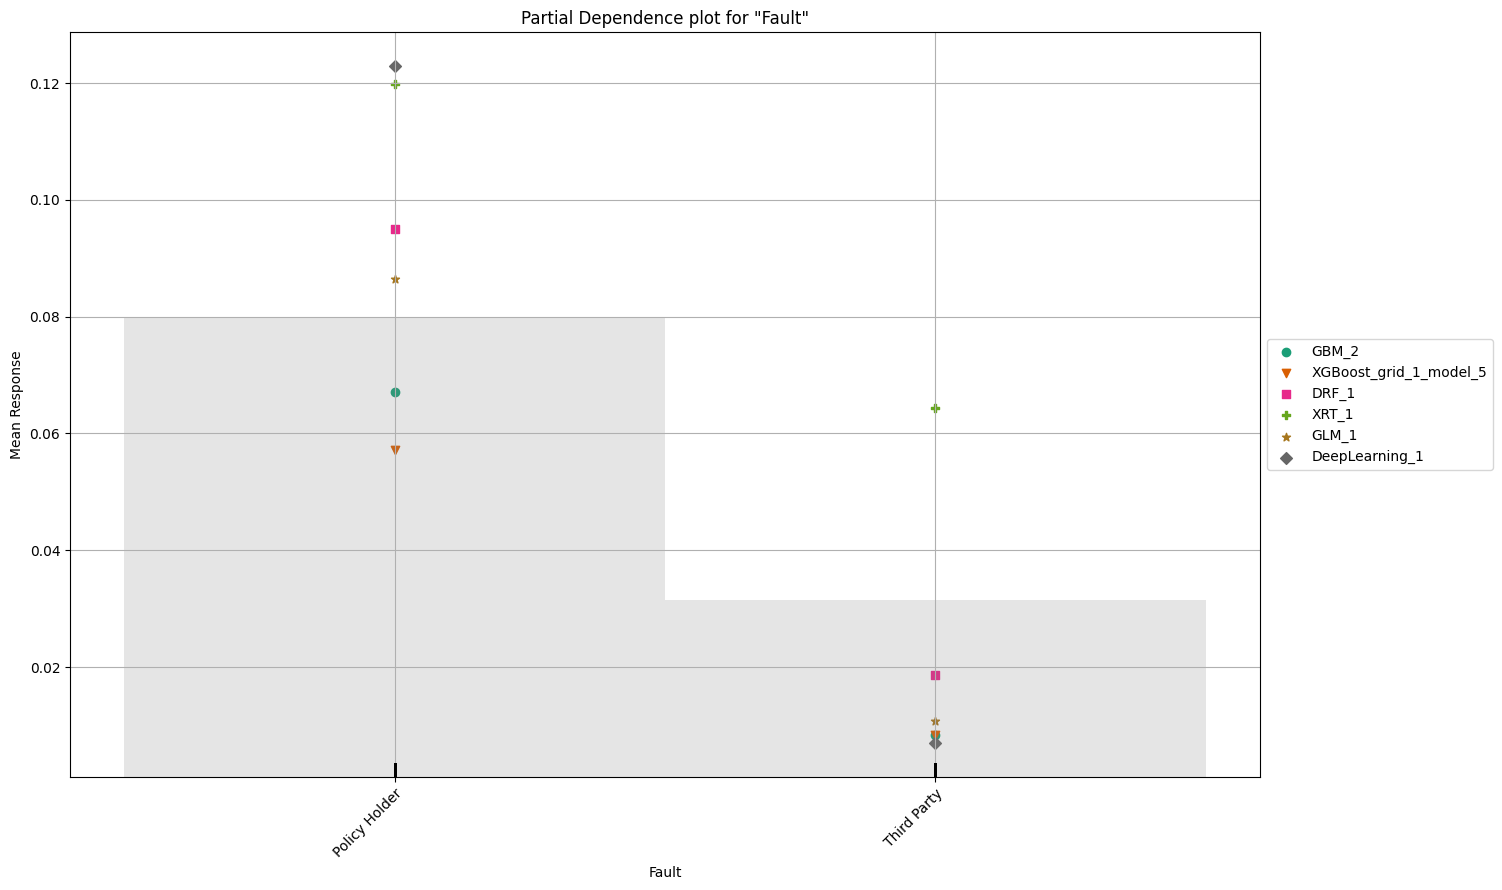

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_2_20241212_163541_model_3,0.953205,0.12035,0.60575,0.148057,0.1887,0.0356078,4511,0.022338,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_7,0.951596,0.119227,0.635564,0.193269,0.183814,0.0337875,23853,0.025269,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_1,0.94857,0.135854,0.618055,0.167057,0.195431,0.0381932,37925,0.029745,XGBoost
XGBoost_3_AutoML_2_20241212_163541,0.948283,0.121933,0.60496,0.184008,0.189445,0.0358894,10427,0.031679,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_2,0.947648,0.125585,0.629944,0.187227,0.189081,0.0357517,6267,0.041396,XGBoost
XGBoost_grid_1_AutoML_2_20241212_163541_model_5,0.94744,0.130516,0.598972,0.166944,0.193857,0.0375806,24831,0.024689,XGBoost
GBM_2_AutoML_2_20241212_163541,0.944941,0.128625,0.569113,0.164072,0.19592,0.0383846,2865,0.053286,GBM
GBM_1_AutoML_2_20241212_163541,0.944068,0.127911,0.553574,0.151231,0.19609,0.0384514,4969,0.064153,GBM
GBM_5_AutoML_2_20241212_163541,0.939792,0.131318,0.569431,0.208288,0.196651,0.0386717,4932,0.061629,GBM
GBM_4_AutoML_2_20241212_163541,0.938172,0.135551,0.54294,0.17844,0.200203,0.0400813,6645,0.044617,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_2_AutoML_2_20241212_163541

,0,1,Error,Rate
0,4053.0,205.0,0.0481,(205.0/4258.0)
1,77.0,198.0,0.28,(77.0/275.0)
Total,4130.0,403.0,0.0622,(282.0/4533.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

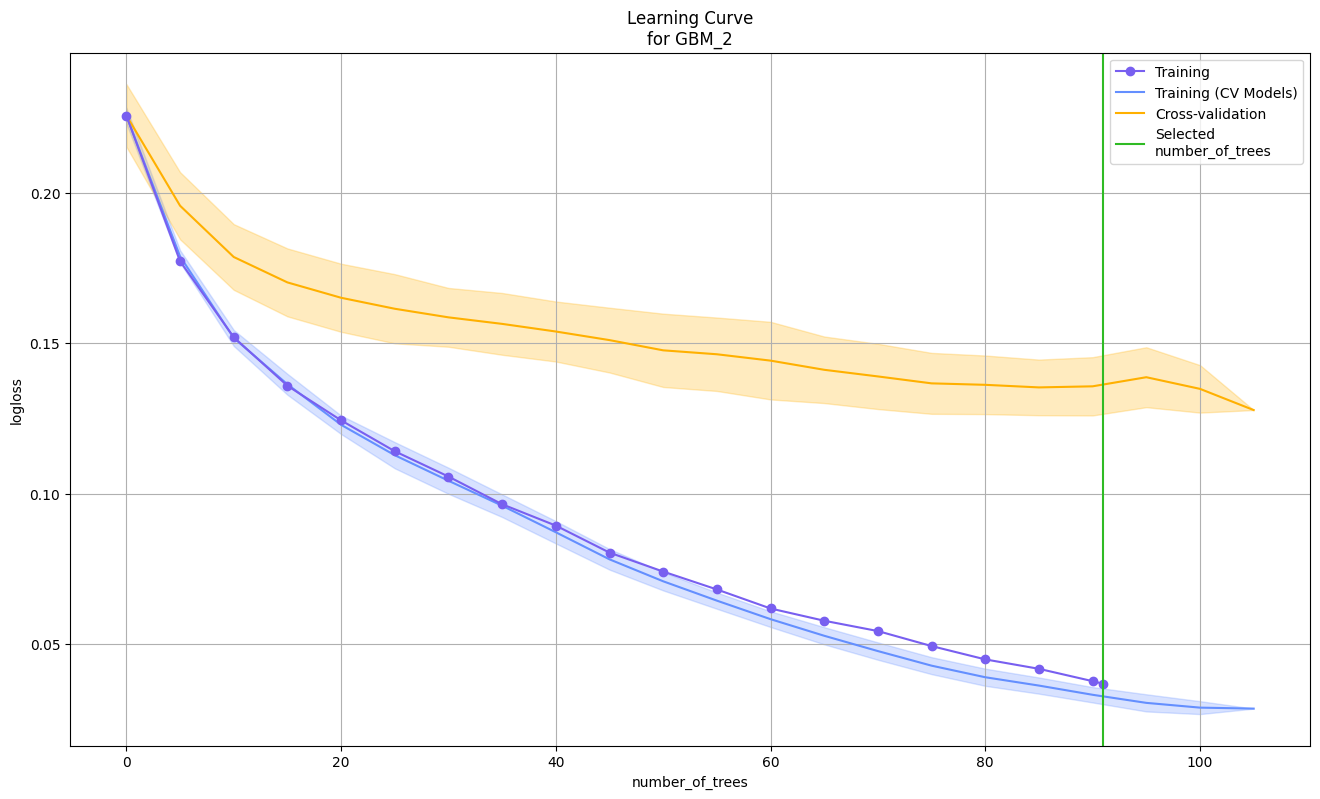

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

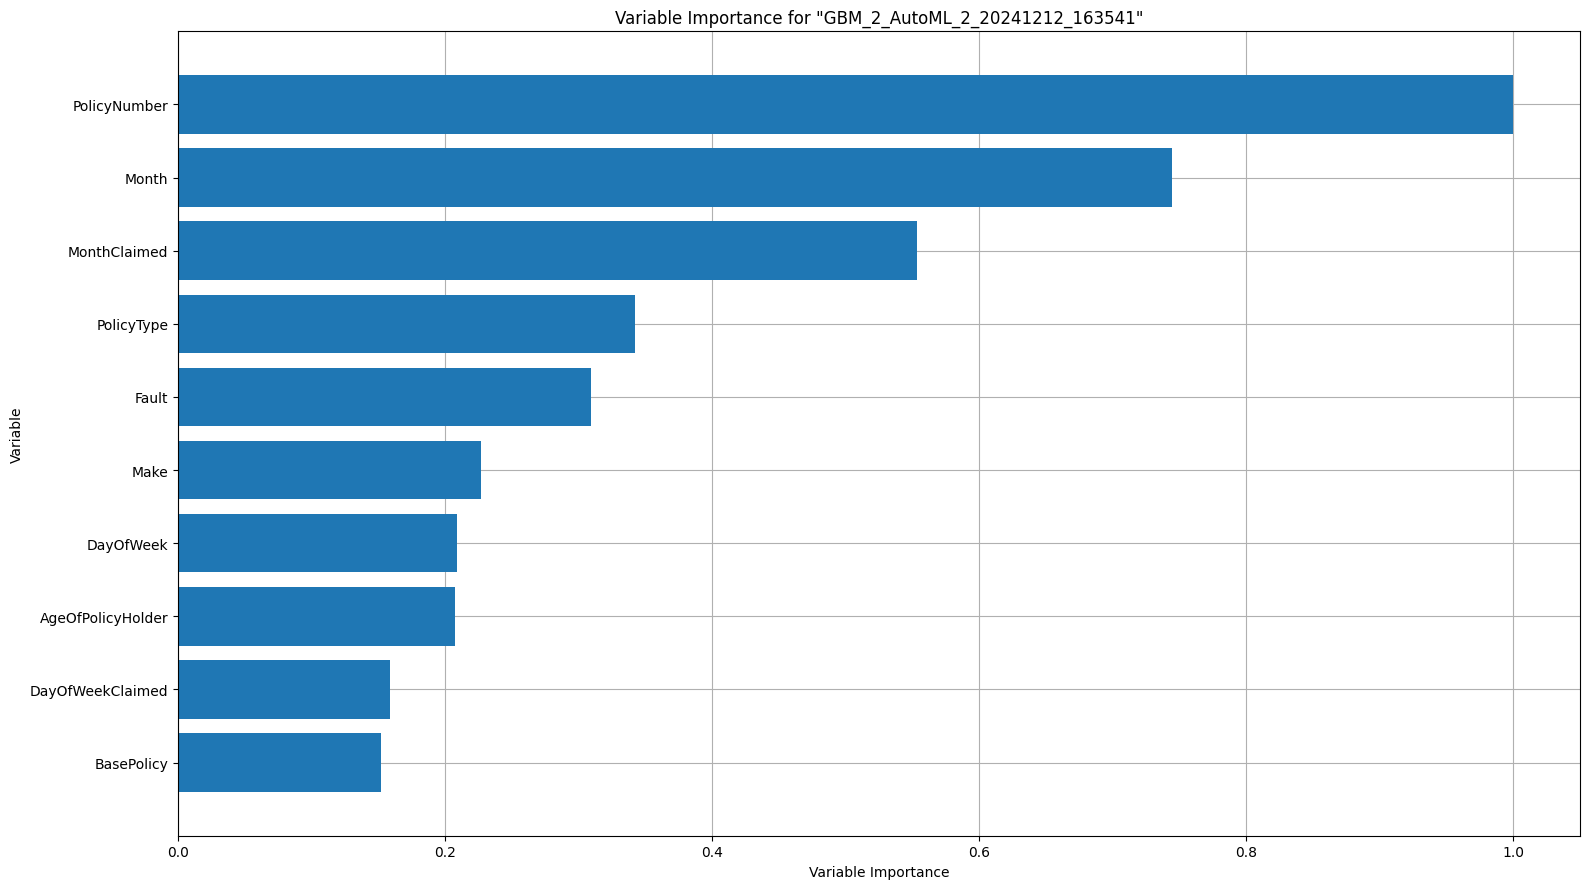

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

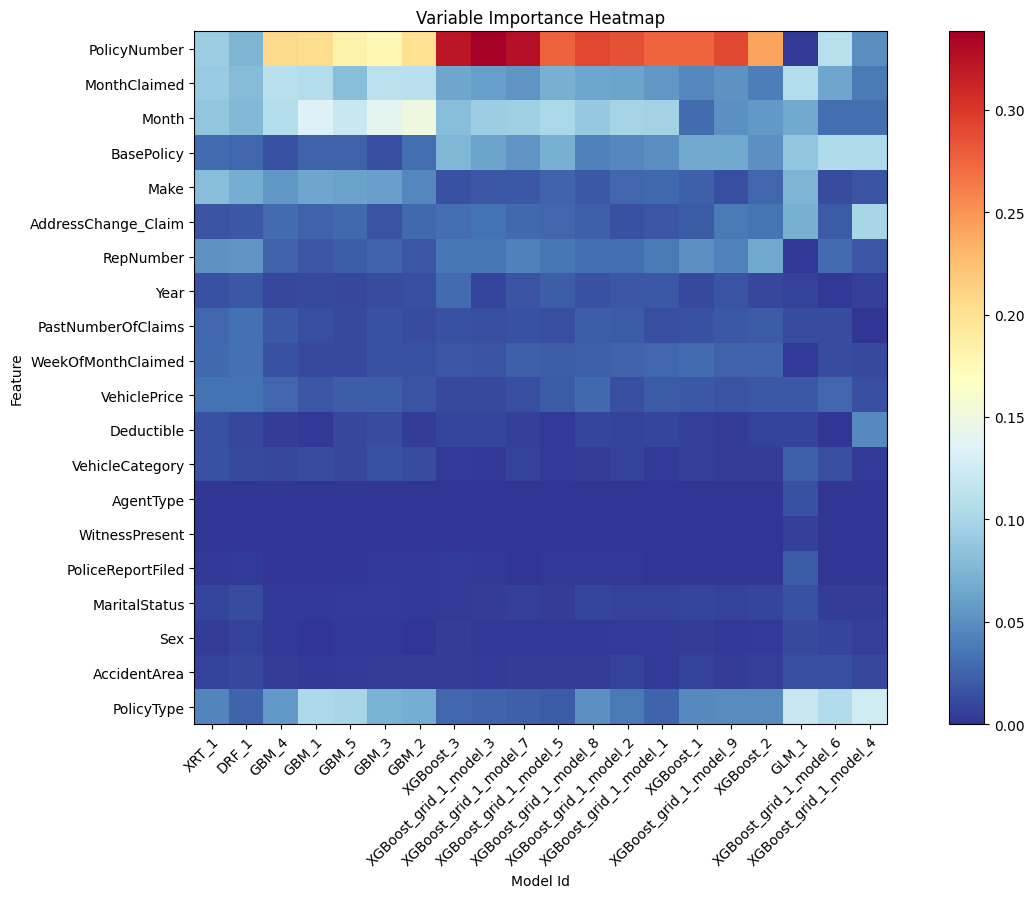

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

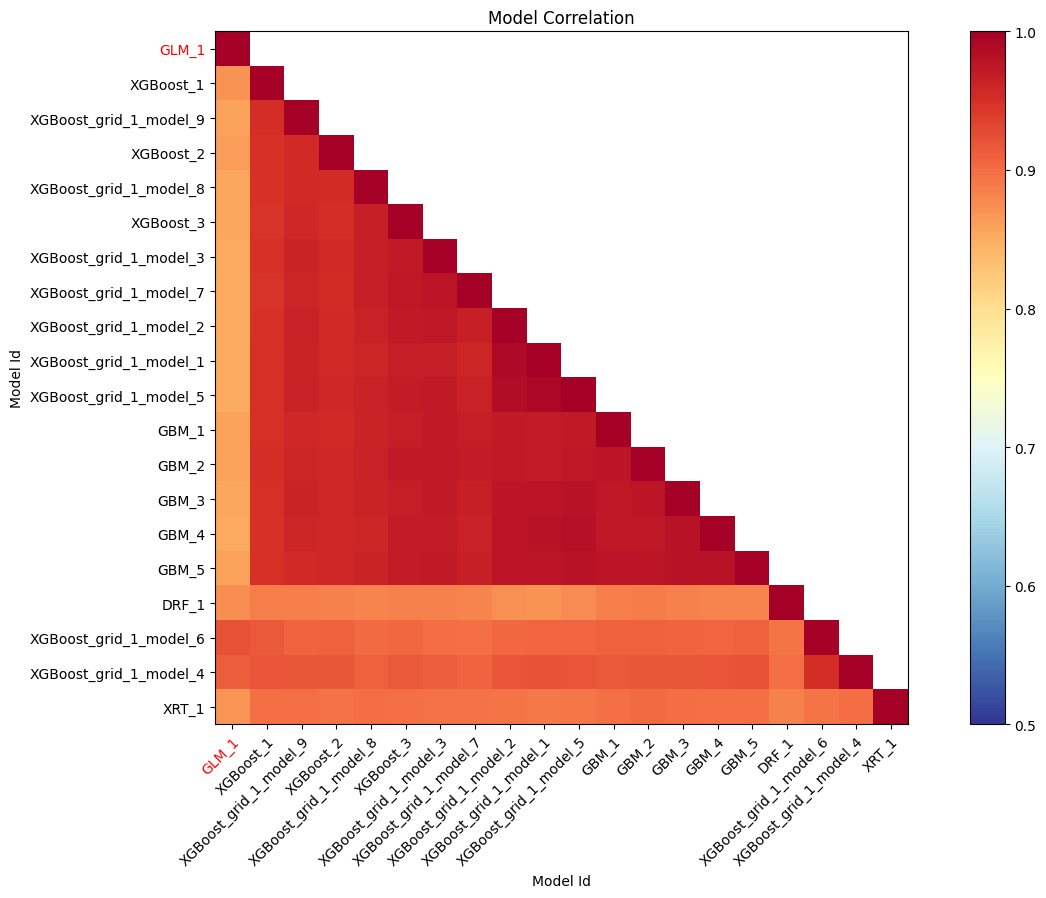

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

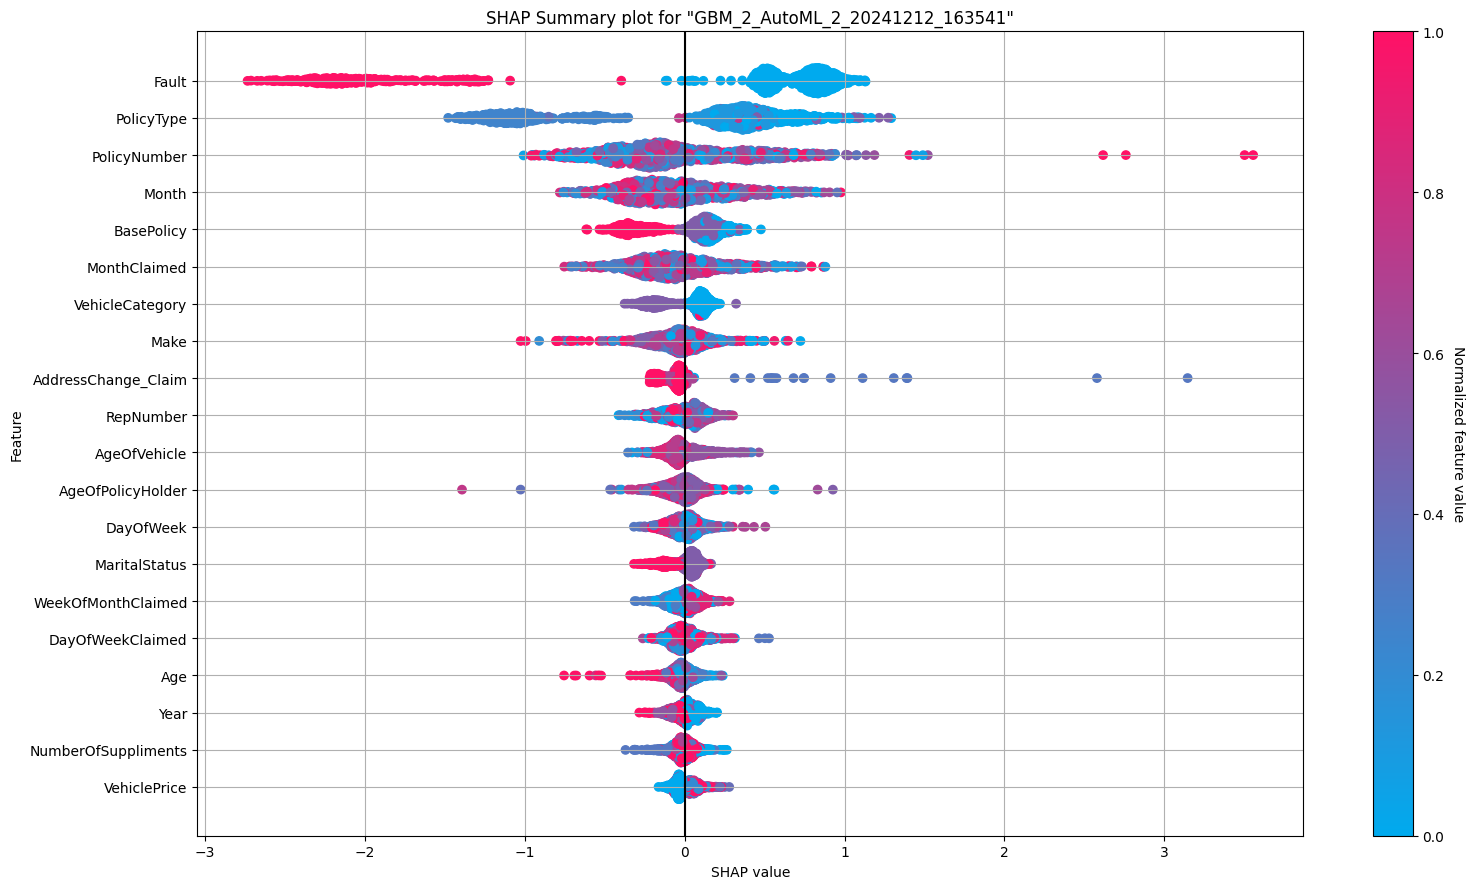

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

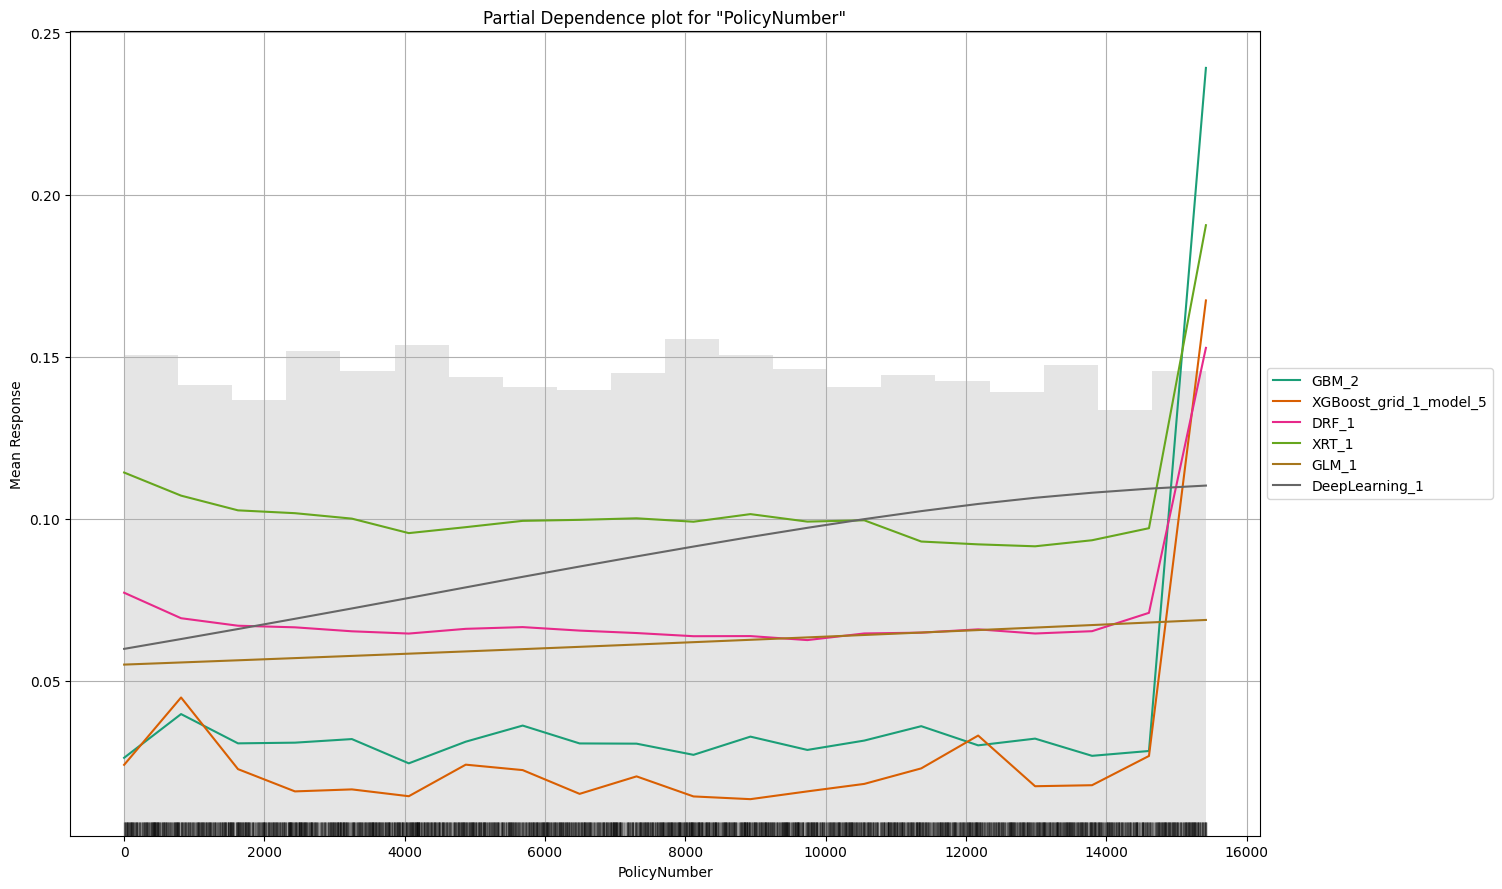

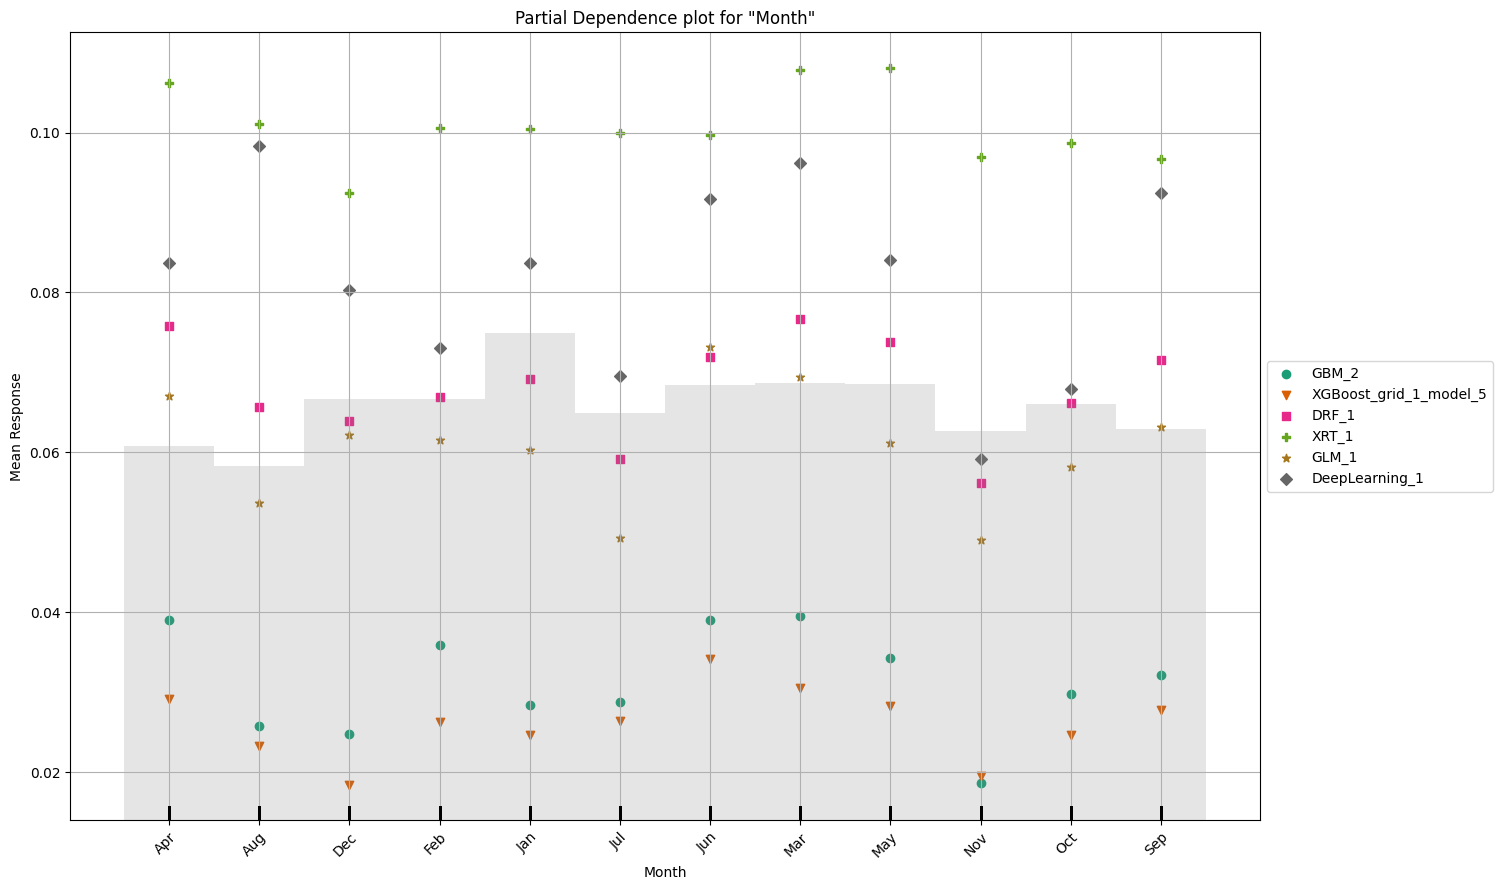

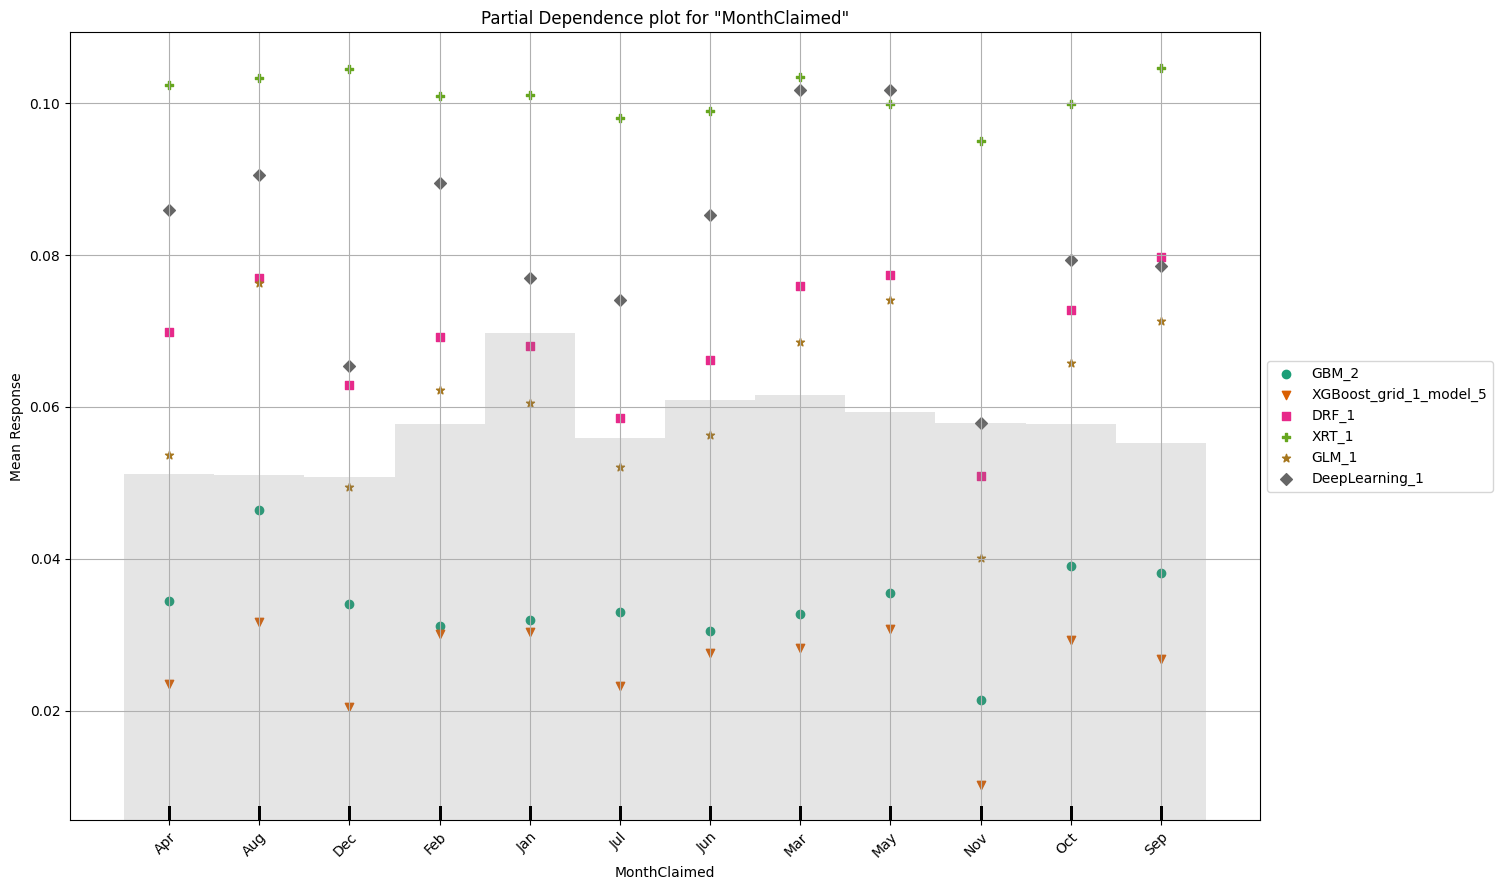

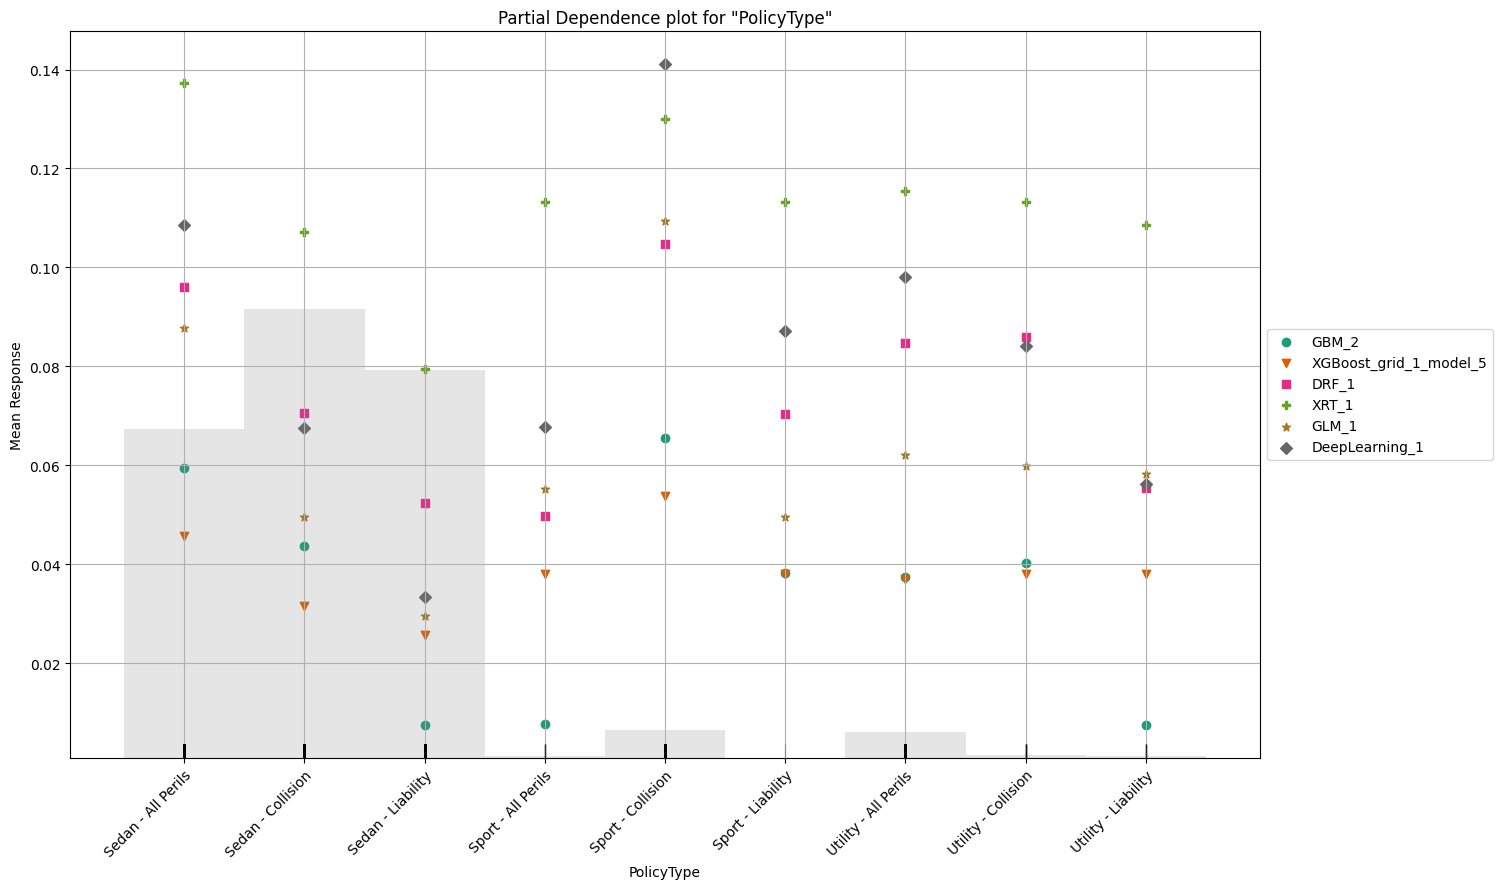

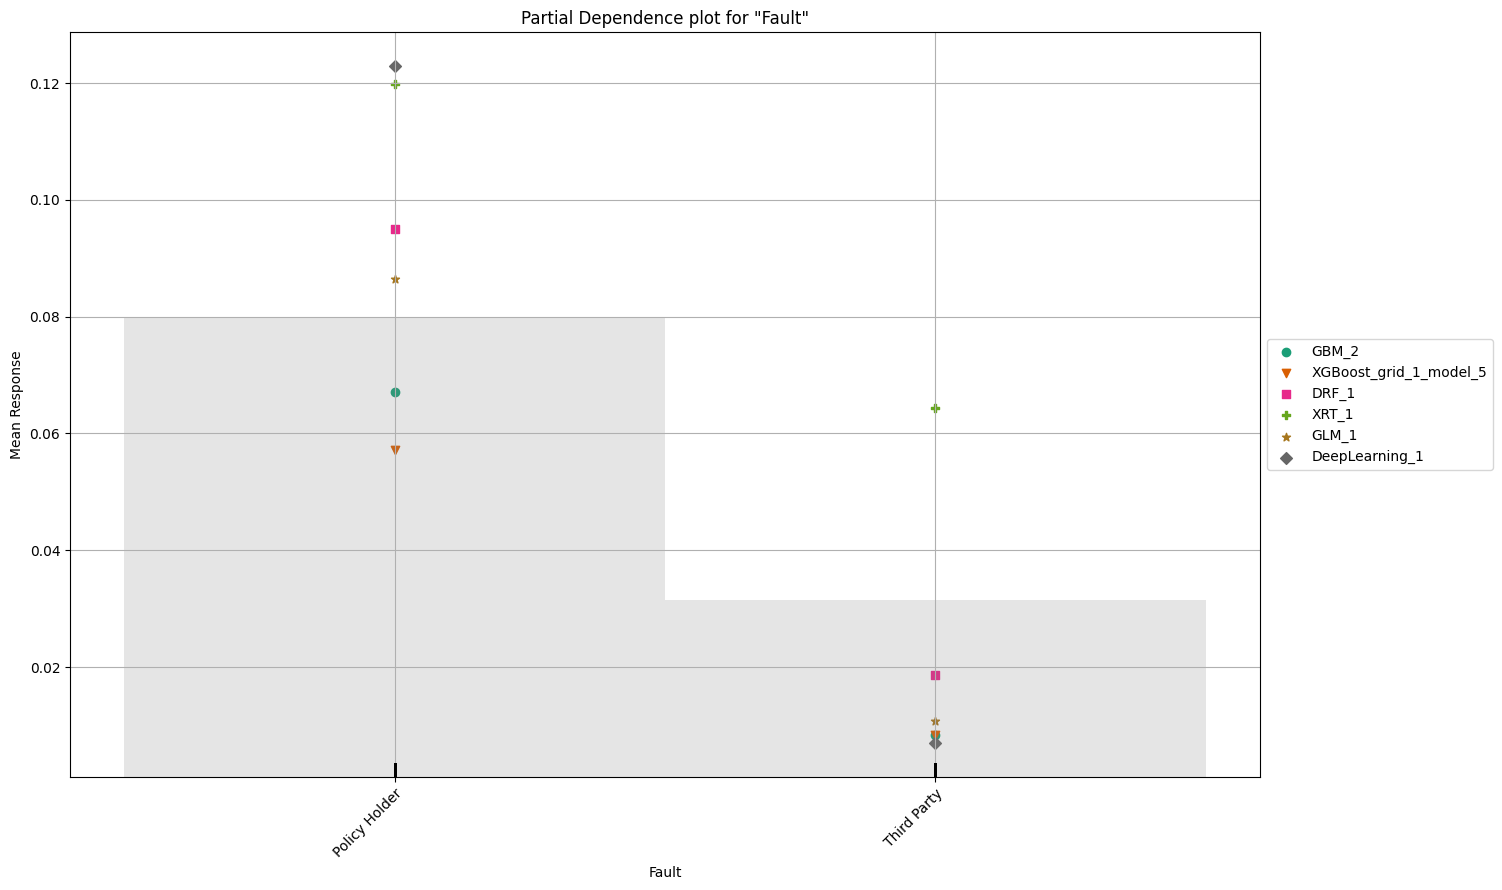

In [62]:
automl.explain(test_h2o)

In [63]:
lb = automl.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_2_20241212_163541,0.940222,0.134986,0.52745,0.201305,0.200785,0.0403146
XGBoost_grid_1_AutoML_2_20241212_163541_model_5,0.940197,0.139278,0.560535,0.19886,0.198923,0.0395703
XGBoost_grid_1_AutoML_2_20241212_163541_model_1,0.937947,0.150322,0.54993,0.224555,0.202837,0.0411427
XGBoost_grid_1_AutoML_2_20241212_163541_model_7,0.936767,0.13721,0.529452,0.219164,0.199023,0.0396102
GBM_5_AutoML_2_20241212_163541,0.936621,0.135972,0.524596,0.231328,0.20065,0.0402603
XGBoost_grid_1_AutoML_2_20241212_163541_model_3,0.935579,0.135977,0.523119,0.20244,0.198235,0.039297
GBM_1_AutoML_2_20241212_163541,0.934502,0.138341,0.473905,0.238614,0.203379,0.041363
GBM_4_AutoML_2_20241212_163541,0.931753,0.143137,0.52681,0.238248,0.204015,0.0416222
XGBoost_3_AutoML_2_20241212_163541,0.931062,0.135017,0.507516,0.218342,0.198685,0.0394759
XGBoost_grid_1_AutoML_2_20241212_163541_model_2,0.928381,0.145768,0.527019,0.232735,0.201481,0.0405945


In [64]:
best_model = automl.leader
best_model

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_2_20241212_163541


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    91                 91                          81361                  7            7            7             31            114           66.4066

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.006953460997454252
RMSE: 0.08338741510236573
LogLoss: 0.036669154088487144
Mean Per-Class Error: 0.004521240093329375
AUC: 0.999949967922017
AUCPR: 0.9991956944657004
Gini: 0.9998999358440339

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31758471997593396
       0     1    Error    Rate
-----  ----  ---  -------  --------------
0      9935  11   0.0011   (11.0/9946.0)
1      5     625  0.0079   (5.0/630.0)
Total  9940  636  0.0015   (16.0/10576.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.317585     0.987362  189
max f2                       0.282505     0.990849  195
max f0point5                 0.388103     0.98975   181
max accuracy                 0.360443     0.998487  184
max precision                0.981795     1         0
max recall                   0.225423     1         207
max specificity              0.981795     1         0
max absolute_mcc             0.317585     0.98657   189
max min_per_class_accuracy   0.268295     0.997386  198
max mean_per_class_accuracy  0.268295     0.997899  198
max tns                      0.981795     9946      0
max fns                      0.981795     629       0
max fps                      0.000307703  9946      399
max tps                      0.225423     630       207
max tnr                      0.981795     1         0
max fnr                      0.981795     0.998413  0
max fpr                      0.000307703  1         399
max tpr                      0.225423     1         207

Gains/Lift Table: Avg response rate:  5.96 %, avg score:  5.93 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100227                   0.868781           16.7873  16.7873            1                0.915737     1                           0.915737            0.168254        0.168254                   1578.73  1578.73            0.168254
2        0.0200454                   0.799317           16.7873  16.7873            1                0.83271      1                           0.874224            0.168254        0.336508                   1578.73  1578.73            0.336508
3        0.0300681                   0.745537           16.7873  16.7873            1                0.772572     1                           0.84034             0.168254        0.504762                   1578.73  1578.73            0.504762
4        0.0400908                   0.687982           16.7873  16.7873            1                0.719952     1                           0.810243            0.168254        0.673016                   1578.73  1578.73            0.673016
5        0.0500189                   0.590081           16.6274  16.7556            0.990476         0.643469     0.99811                     0.77714    

In [65]:
y_pred_h2o = best_model.predict(test_h2o)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [66]:
!pip install pyarrow polars

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [67]:
y_pred_h2o

predict,p0,p1
0,0.997305,0.00269495
0,0.995346,0.00465361
0,0.947485,0.0525147
1,0.537571,0.462429
0,0.999469,0.000531323
0,0.997402,0.00259824
0,0.999042,0.000958218
0,0.754313,0.245687
0,0.999294,0.000705573
0,0.98897,0.0110296


In [68]:
y_pred_h2o = y_pred_h2o[:len(y_test)]

In [69]:
print(y_pred_h2o[:10])

  predict        p0           p1
        0  0.997305  0.00269495
        0  0.995346  0.00465361
        0  0.947485  0.0525147
        1  0.537571  0.462429
        0  0.999469  0.000531323
        0  0.997402  0.00259824
        0  0.999042  0.000958218
        0  0.754313  0.245687
        0  0.999294  0.000705573
        0  0.98897   0.0110296
[4533 rows x 3 columns]



In [70]:
print(y_test[:10])  # Print the first 10 true labels

11695    0
3433     0
1958     0
2313     1
2255     0
10084    0
12618    0
10466    0
5733     0
8003     0
Name: FraudFound_P, dtype: int64


In [71]:
import warnings
warnings.filterwarnings('ignore', message='Test/Validation dataset column .* has levels not trained on')

In [72]:
predictions = best_model.predict(test_h2o)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [73]:
predictions_df = predictions.as_data_frame(use_multi_thread=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [74]:
predictions_binary = (predictions_df['predict'] >= 0.5).astype(int)

In [75]:
accuracy = accuracy_score(test_h2o[target].as_data_frame(use_multi_thread=True), predictions_binary)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [76]:
confusion = confusion_matrix(test_h2o[target].as_data_frame(use_multi_thread=True), predictions_binary)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [77]:
classification = classification_report(test_h2o[target].as_data_frame(use_multi_thread=True), predictions_binary, zero_division=0)
print("Classification Report: \n", classification)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      4258
           1       0.63      0.37      0.47       275

    accuracy                           0.95      4533
   macro avg       0.79      0.68      0.72      4533
weighted avg       0.94      0.95      0.94      4533



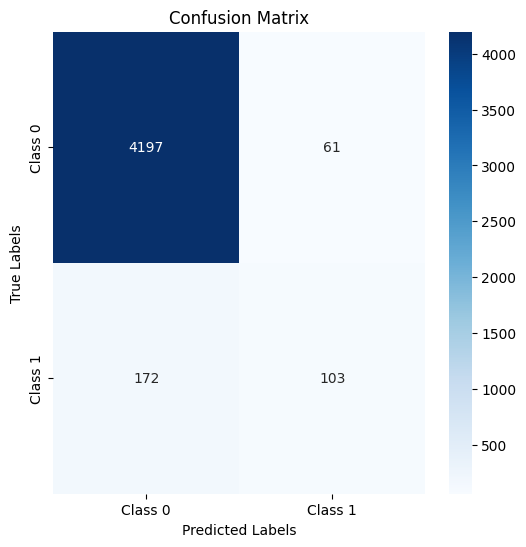

In [78]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

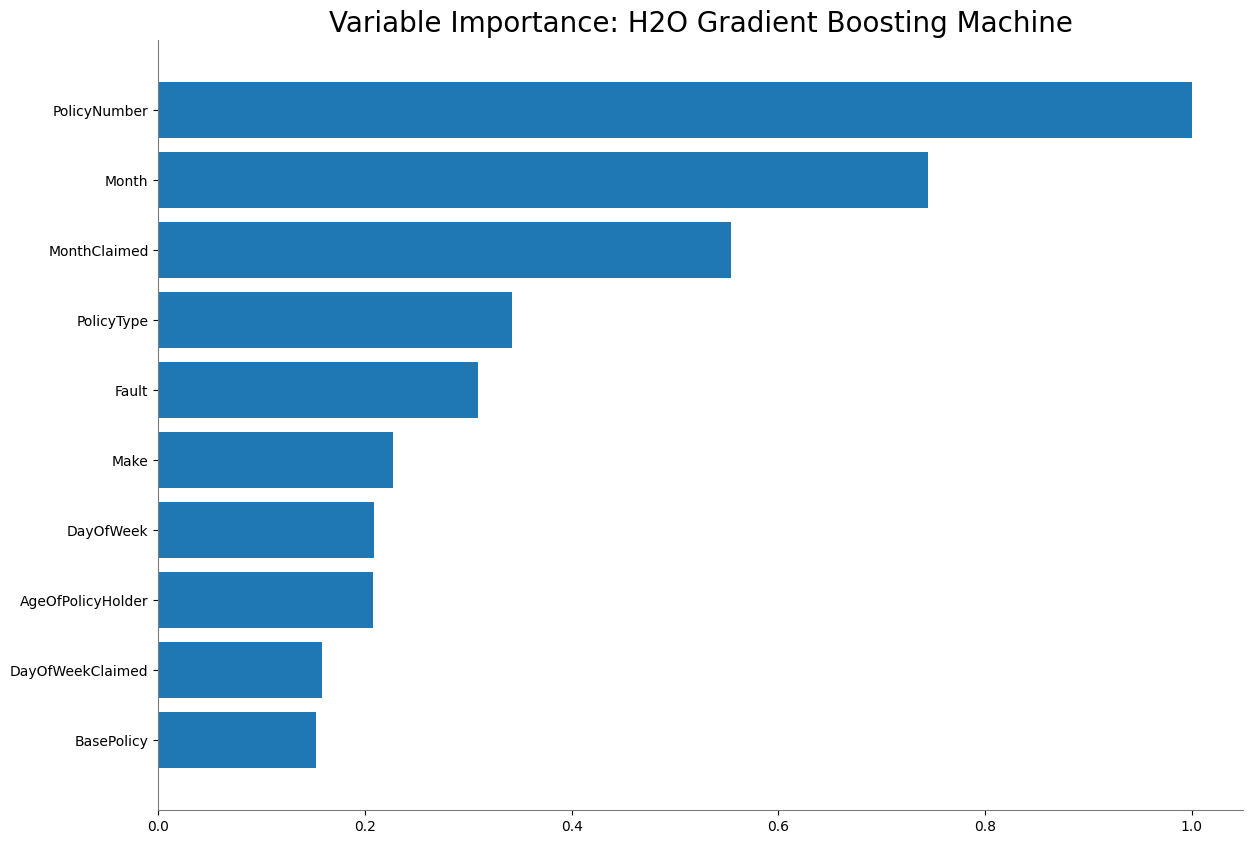

<Figure size 640x480 with 0 Axes>

In [79]:
best_model.varimp_plot()

In [80]:
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred,zero_division=1))
print("decisiontree Classification Report:\n", classification_report(y_test, y_pred_dt,zero_division=1))
print("H2O AutoML Classification Report:\n", classification_report(y_test, predictions_binary,zero_division=1))

RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4258
           1       0.60      0.01      0.02       275

    accuracy                           0.94      4533
   macro avg       0.77      0.51      0.50      4533
weighted avg       0.92      0.94      0.91      4533

decisiontree Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4258
           1       1.00      0.03      0.06       275

    accuracy                           0.94      4533
   macro avg       0.97      0.51      0.51      4533
weighted avg       0.94      0.94      0.91      4533

H2O AutoML Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      4258
           1       0.63      0.37      0.47       275

    accuracy                           0.95      4533
   macro avg       

In [81]:
#CONCLUSION:
#WHEN WE ARE PERFORMING ANY ML ALGORITHMS WE SHOULD NEED TO DO PERFECT DATA PREPROCESSING THEN IT WILL GIVE PERFECT ACCURACY AND MODEL PREDICTION...